<a href="https://colab.research.google.com/github/ccwu0918/F0713-CPlusPlus/blob/main/C%2B%2B_Chapter08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 班級: 資工一  學號: 13913001 姓名: 吳佳駿

In [ ]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

In [ ]:
!nvcc --version

#**Chapter 8: 陣列與字串**



#8.1 一維陣列
#8.1.1 一維陣列的宣告：prog8_1 (Page 8-3)
下面是利用sizeof() 印出陣列score與其中任一個元素的長度範例：

In [ ]:
%%cuda
// prog8_1, 一維陣列
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int score[6];

   // 印出陣列中個別元素的長度及陣列的總長度
   cout << "sizeof(score[1]) = " << sizeof(score[1]) << endl;
   cout << "sizeof(score) = " << sizeof(score) << endl;
   // system("pause");
   return 0;
}

#8.1.2 下圖為score陣列中元素的表示法及排列方式： (Page 8-4)




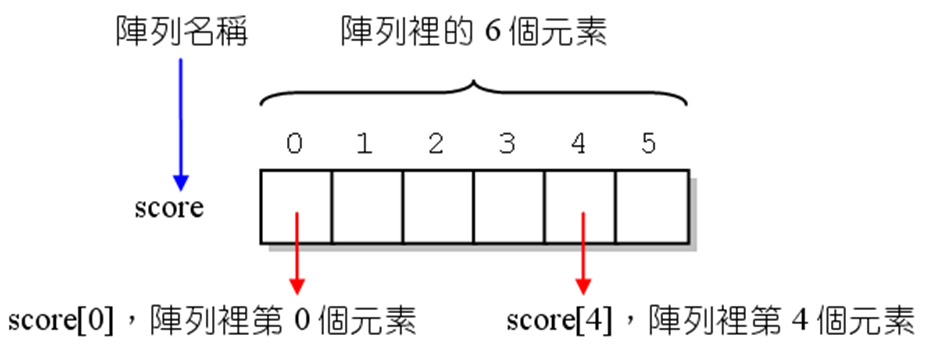

#8.1.3 陣列初值的設定

在宣告時就給予陣列初值，可用下面的語法： (Page 8-4, 8-5)

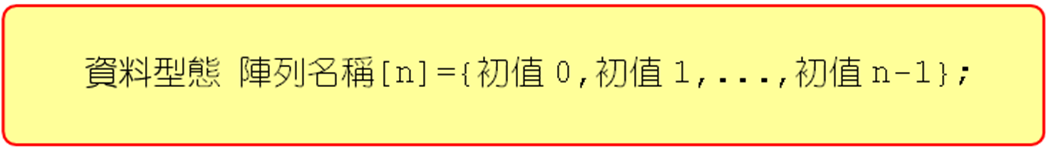

C陣列宣告及初值的設定範例

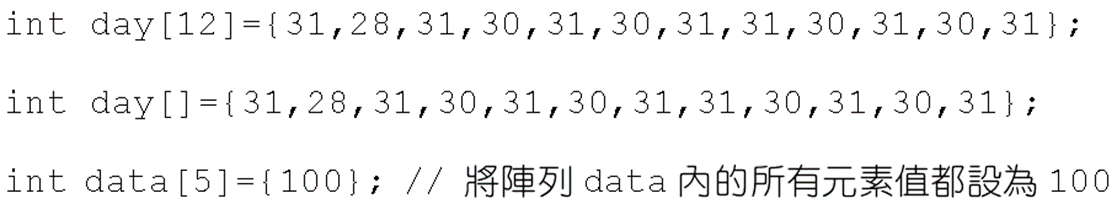

#8.1.3 陣列初值的設定 ：prog8_2 (Page 8-6)

下面的程式碼是一維陣列設定初值的範例：

In [ ]:
%%cuda
// prog8_2, 一維陣列的設值
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i, a[] = {15,6,8};
   int length = sizeof(a) / sizeof(int);   	    // 計算陣列元素個數
   for(i = 0; i < length; i++)  			        // 印出陣列的內容
      cout << "a[" << i << "]=" << a[i] << ", ";
   cout << endl << "array a has " << length << " elements"; // 印出length
   // system("pause");
   return 0;
}

#8.1.4 簡單的範例： prog8_3 (Page 8-7)

下面的例子說明如何將陣列裡的最大及最小值列出的範例：

In [ ]:
%%cuda
// prog8_3, 比較陣列元素值的大小
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int A[] = {48,75,30,17,62};			            // 宣告整數陣列A,並設定初值
   int i, min = A[0], max = A[0];
   int length = sizeof(A) / sizeof(int);   	            // 計算陣列元素個數
   cout << "elements in array A are ";
   for(i = 0; i < length; i++)   			                // 印出陣列的內容
   {
      cout << A[i] << "  ";
      if(A[i] > max)	                                // 判斷最大值
         max = A[i];
      if(A[i] < min)	                                // 判斷最小值
         min = A[i];
   }
   cout << endl << "Maximum is " << max;			// 印出最大值
   cout << endl << "Minimum is " << min << endl;	// 印出最小值
   // system("pause");
   return 0;
}

#8.1.5 陣列界限的檢查：prog8_4 (Page 8-8, 8-9)

下面的程式裡，將陣列界限的檢查範圍加入所撰寫而成的範例：

In [ ]:
%%cuda
// prog8_4, 陣列的界限檢查
#include <iostream>
#include <cstdlib>
using namespace std;
#define MAX 5
int main(void)
{
   int score[MAX];
   int i = 0, num;
   float sum = 0.0f;
   cout << "Enter 0 stopping input!!" << endl;
   do
   {
      if(i == MAX)	               // 當i的值為MAX，表示陣列已滿，即停止輸入
      {
         cout << "No more space!!" << endl;
         i++;
         break;
      }
      cout << "Input score:";
      cin >> score[i];
   } while(score[i++] > 0);           // 輸入成績，輸入0或負數時結束
   num = i-1;
   for(i = 0; i < num; i++)
      sum += score[i];		       // 計算平均成績
   cout << "Average of all is " << sum/num << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog8_4.cpp
// prog8_4, 陣列的界限檢查
#include <iostream>
#include <cstdlib>
using namespace std;
#define MAX 5
int main(void)
{
   int score[MAX];
   int i = 0, num;
   float sum = 0.0f;
   cout << "Enter 0 stopping input!!" << endl;
   do
   {
      if(i == MAX)	               // 當i的值為MAX，表示陣列已滿，即停止輸入
      {
         cout << "No more space!!" << endl;
         i++;
         break;
      }
      cout << "Input score:";
      cin >> score[i];
   } while(score[i++] > 0);           // 輸入成績，輸入0或負數時結束
   num = i-1;
   for(i = 0; i < num; i++)
      sum += score[i];		       // 計算平均成績
   cout << "Average of all is " << sum/num << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog8_4.cpp -o prog8_4

In [ ]:
!./prog8_4

#8.2 二維以上的多維陣列

#8.2.1 二維陣列的宣告與配置記憶體： (Page 8-10, 8-11, 8-12)


二維陣列（2-dimensional array） 宣告格式

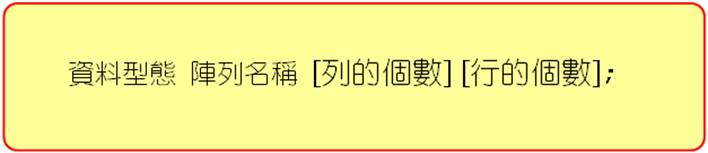

下面的範例都是合法的陣列宣告

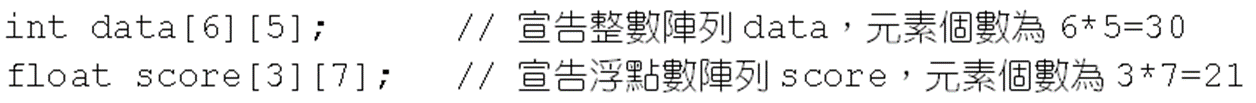

下表是年度銷售量，可利用二維陣列將資料儲存起來

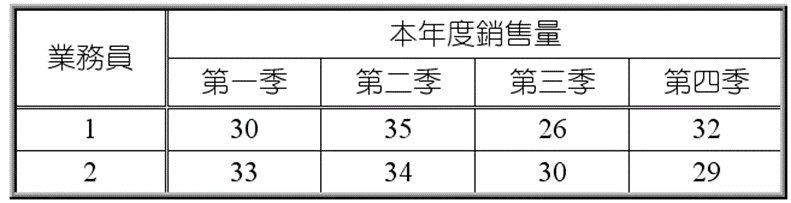

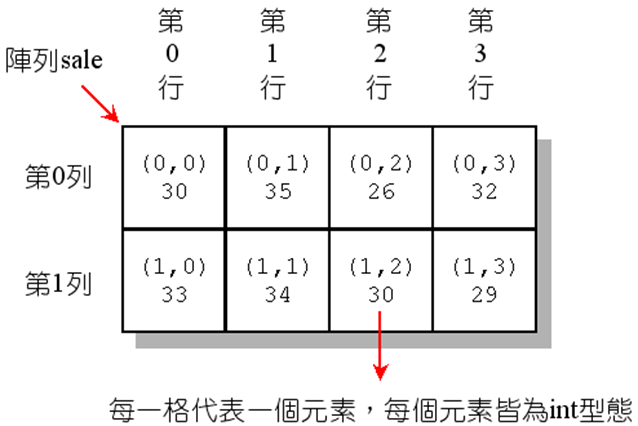

想直接在宣告時就給予陣列初值，如下面的格式

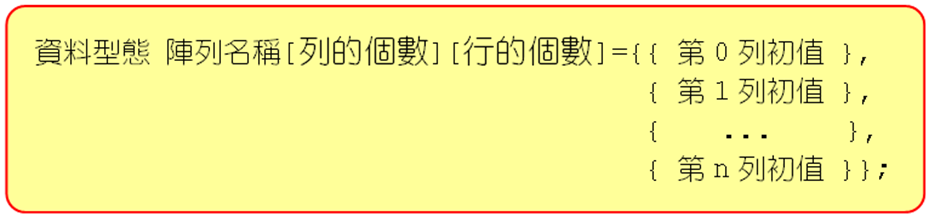

下面的陣列sale宣告及初值的設定範例  

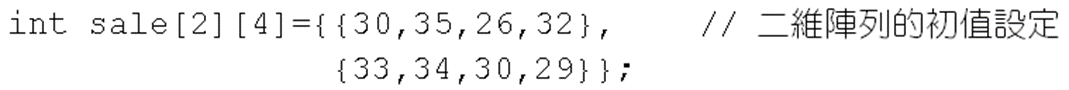

二維陣列的初值設定可依下面的說明來設定

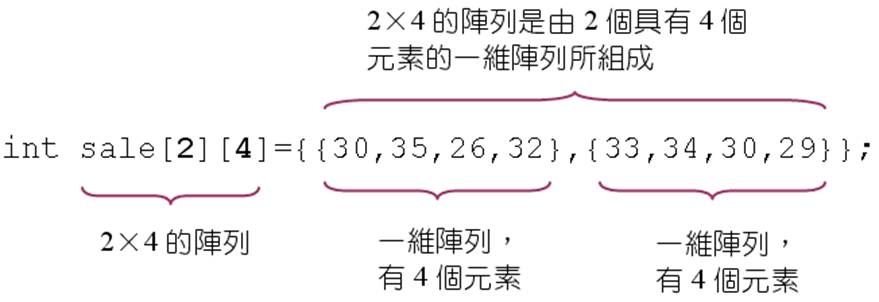

宣告二維陣列，並設定初值時，列的個數可以省略

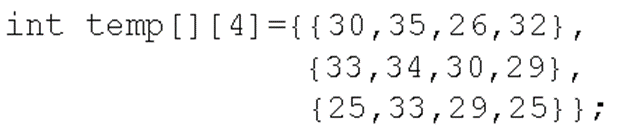

#8.2.2 二維陣列元素的引用及存取：prog8_5 (Page 8-13)

下面的程式是以二維陣列sale為例，介紹如何讀取二維陣列之範例：

In [ ]:
%%cuda
// prog8_5, 二維陣列的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i, j, sum = 0;
   int sale[2][4] = {{30,35,26,32},{33,34,30,29}};    // 宣告陣列並設定初值
   for(i=0;i<2;i++)	                                // 輸出銷售量並計算總銷售量
   {
      cout << "業務員" << (i+1) << "的業績分別為 ";
      for(j = 0; j < 4; j++)
      {
	      cout << sale[i][j] << " ";
	      sum += sale[i][j];
      }
      cout << endl;
   }
   cout << endl << "本年度總銷售量為" << sum << "輛車" << endl;
   // system("pause");
   return 0;
}

#8.2.3 多維陣列： (Page 8-14)

要宣告一個2×4×3的陣列A，可以利用下面的語法：


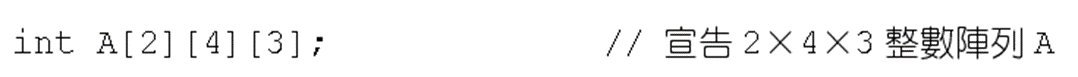

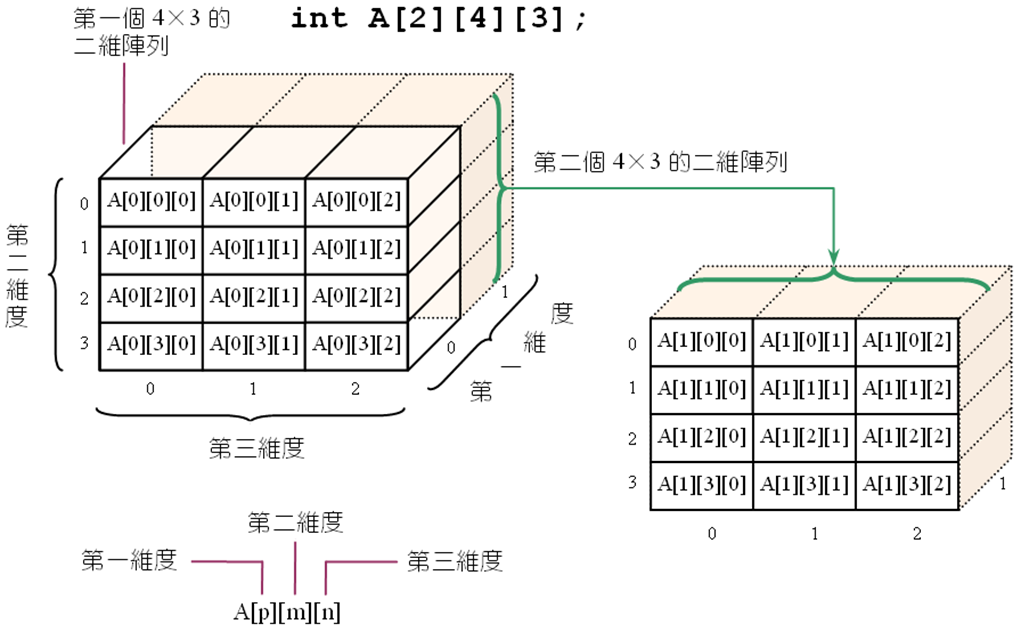

#8.2.3 多維陣列：prog8_6 (Page 8-15)

下面的範例說明如何在三維陣列裡，找出元素的最大值：


In [ ]:
%%cuda
// prog8_6, 三維陣列的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int A[2][4][3] = {{{21,32,65},        // 宣告陣列並設定初值
              {78,94,76},
              {79,44,65},
              {89,54,73}},
             {{32,56,89},
              {43,23,32},
              {32,56,78},
              {94,78,45}}};
   int i, j, k, max = A[0][0][0];           // 設定max為A陣列的第一個元素

   for(i = 0; i < 2; i++)
      for(j = 0; j < 4; j++)
         for(k = 0; k < 3; k++)
            if(max < A[i][j][k])
               max = A[i][j][k];
   cout << "max = " << max << endl;		// 印出陣列的最大值

   // system("pause");
   return 0;
}

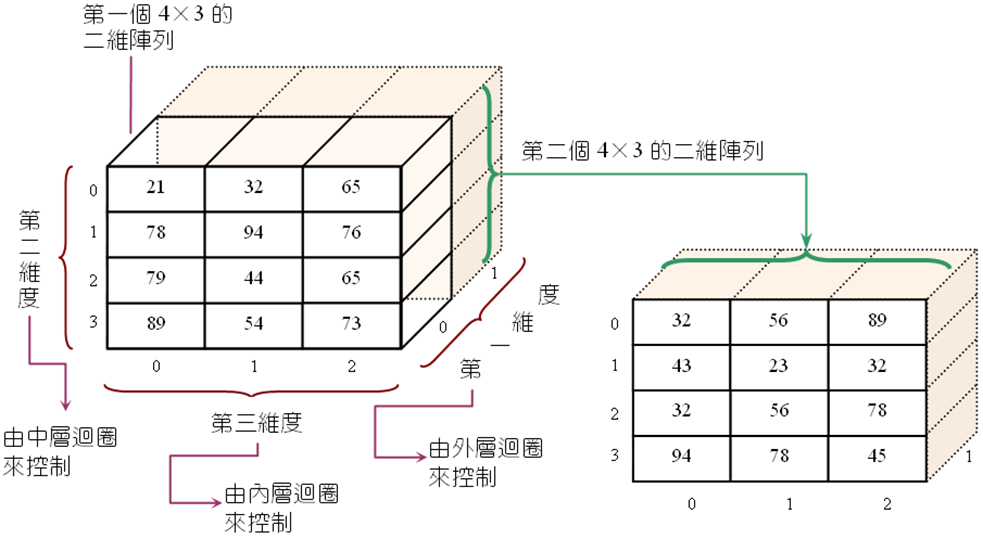

三維陣列A的第一個4×3的二維陣列為

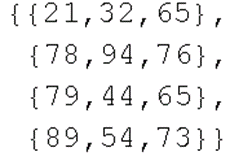

第二個4×3的二維陣列為

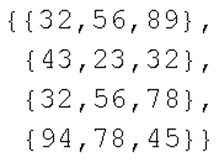

因此2×4×3的三維陣列可以寫成

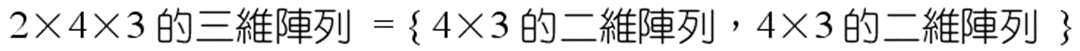

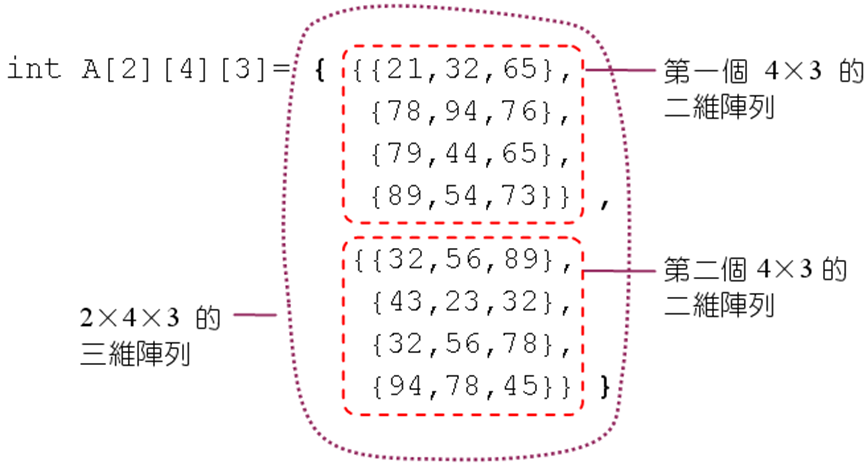

#8.3 傳遞陣列給函數 (Page 8-18)
下面為傳遞一維陣列至函數的格式


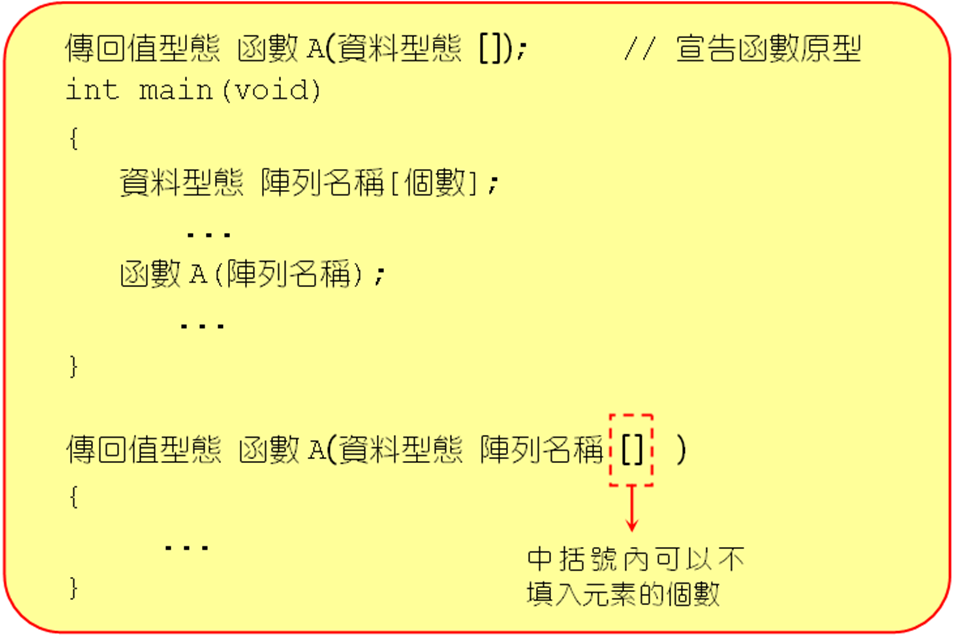


#8.3.1 以一維陣列為引數來傳遞：prog8_7 (Page 8-19)

下面的程式是以一維陣列為引數，傳遞到函數的範例：


In [ ]:
%%cuda
// prog8_7, 以一維陣列為引數
#include <iostream>
#include <cstdlib>
using namespace std;
#define SIZE 5
void show(int []);			              // 函數原型的宣告
double average(int []);		              // 函數原型的宣告
int main(void)
{
   int score[SIZE] = {89,54,73,95,71};	  // 宣告陣列並設定初值
   cout << "學生的成績為 ";
   show(score);
   cout << "平均成績 = " << average(score) << endl;

   // system("pause");
   return 0;
}

void show(int a[])			              // 顯示學生成績
{
   for(int i = 0; i < SIZE; i++)
      cout << a[i] << " ";
   cout << endl;
   return;
}

double average(int a[])		              // 計算平均成績
{
   double sum = 0;
   for(int i = 0; i < SIZE; i++)
      sum += a[i];
   return (sum/SIZE);
}

#8.3.2 傳遞多維陣列 (Page 8-20)
下面為傳遞二維陣列至函數的格式


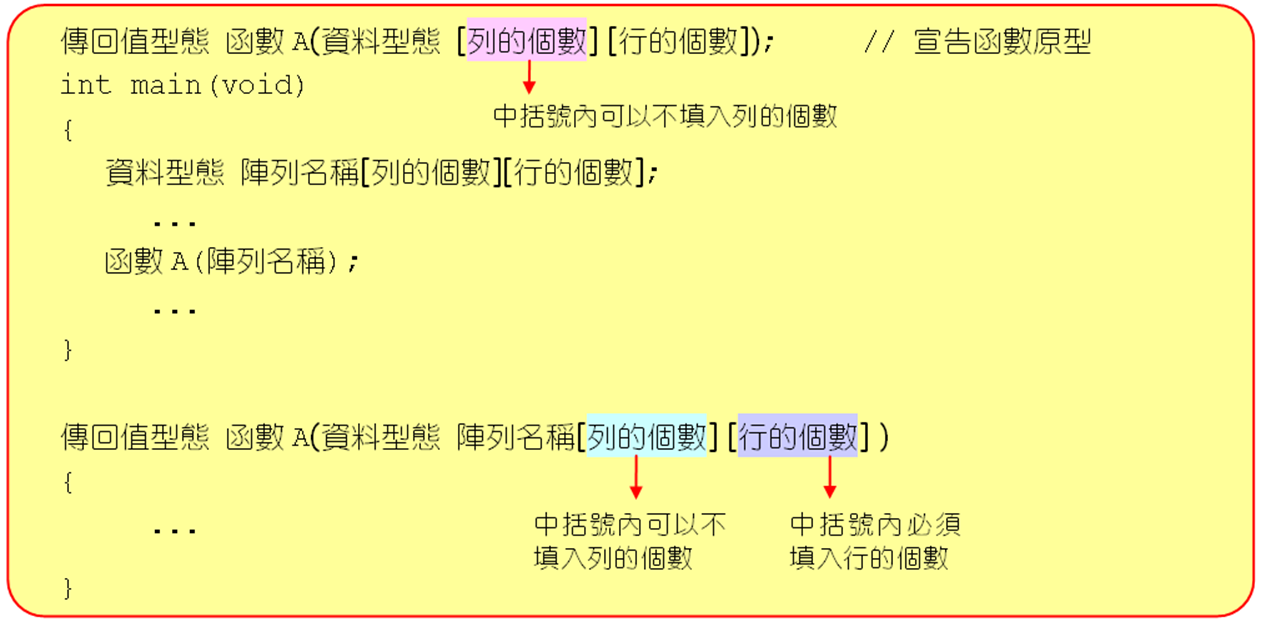

#8.3.2 傳遞多維陣列：prog8_8 (Page 8-20, 8-21)

下面的程式是引數的預設值的使用範例：


In [ ]:
%%cuda
// prog8_8, 傳遞二維陣列 下面是傳遞二維陣列到函數的練習
#include <iostream>
#include <cstdlib>
using namespace std;
#define LEN 2
#define WID 5
void show(int [LEN][WID]);				      // 函數原型的宣告
int main(void)
{
   int A[LEN][WID] = {{81,52,13,96,27},		  // 宣告陣列並設定初值
             {24,23,10,32,16}};
   show(A);

   // system("pause");
   return 0;
}

void show(int a[LEN][WID])            		  // 顯示陣列內容
{
   for(int i = 0; i < LEN; i++)
   {
      for(int j = 0; j < WID; j++)
         cout << a[i][j] << " ";
      cout << endl;
   }
   return;
}

#8.3.3 傳遞「值」還是「位址」到函數？ ：prog8_9 (Page 8-22, 8-23)

下面的程式說明函數傳值的過程範例：

In [ ]:
%%cuda
// prog8_9, 印出變數的位址
#include <iostream>
#include <cstdlib>
using namespace std;
void func(int);           // 宣告函數原型
int main(void)
{
   int a = 13;
   cout << "In main(), a = " << a << ", address = " << &a << endl;
   func(a);
   // system("pause");
   return 0;
}

void func(int a)	      // 自訂函數func()
{
   cout << "In func(), a = " << a << ", address = " << &a << endl;
   return;
}

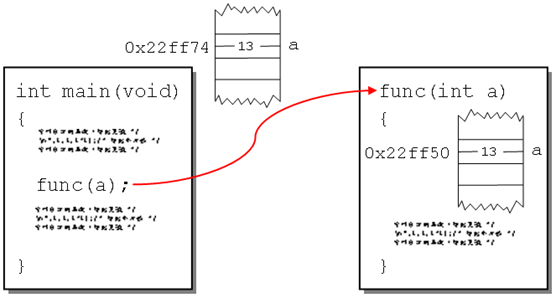

#8.3.3 傳遞「值」還是「位址」到函數？ ：prog8_10 (Page 8-23, 8-24)

下面是函數傳遞陣列位址的範例：

In [ ]:
%%cuda
// prog8_10, 印出陣列的位址
#include <iostream>
#include <cstdlib>
#include <iomanip>
using namespace std;
void func(int []);  		         // 宣告函數原型
int main(void)
{
   int i,a[4] = {20,8,13,6};
   cout << "In main()," << endl;     // 印出陣列a的值及位址
   for(i = 0; i < 4; i++)
   {
      cout << "a[" << i << "] = " << setw(2) << a[i];
      cout << ", address = " << &a[i] << endl;
   }
   func(a);
   // system("pause");
   return 0;
}

void func(int b[])		             // 自訂函數func()
{
   int i;
   cout << "In func()," << endl;	 // 印出陣列b的值及位址
   for(i = 0; i < 4; i++)
   {
      cout << "b[" << i << "] = " << setw(2) << b[i];
      cout << ", address = " << &b[i] << endl;
   }
   return;
}

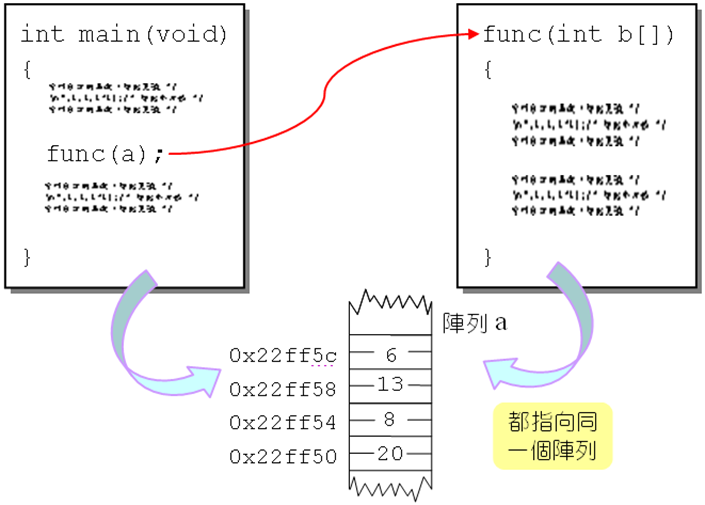

# 8.4 字元陣列--C型態字串

#8.4.1 字串常數： (Page 8-25, 8-26)

字串常數是以兩個雙引號（"）包圍起來的資料

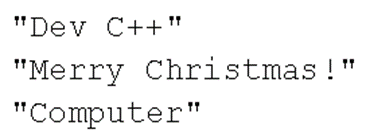

字串儲存在記憶體時，會加上字串結束字元\0做結尾  

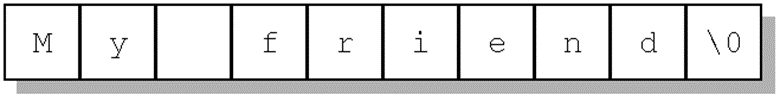

#8.4.2 字元陣列的宣告： (Page 8-26)

字元陣列的宣告格式如下

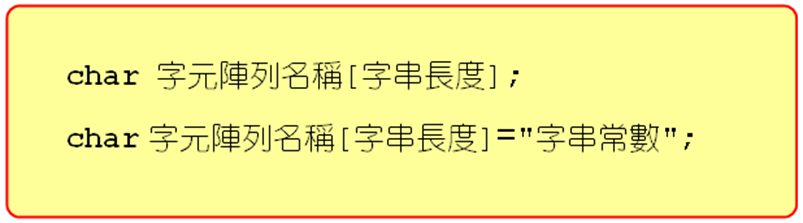

下面的範例為合法的字元變數宣告

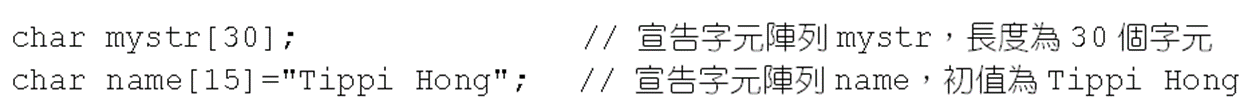

#8.4.2 字元陣列的宣告：prog8_11 (Page 8-27, 8-28)

下面的程式可印出字元及字串的長度的範例：

In [ ]:
%%cuda
// prog8_11, 印出字元及字串的長度
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   char a[] = "My friend";
   char b = 'c', str[] = "c";
   cout << "sizeof(a) = " << sizeof(a) << endl;
   cout << "sizeof(b) = " << sizeof(b) << endl;
   cout << "sizeof(str) = " << sizeof(str) << endl;
   // system("pause");
   return 0;
}

#8.4.3 字串的輸出與輸入：prog8_12 (Page 8-29, 8-30)

下面的程式使用cout及cin的範例（輸出有誤）：

In [ ]:
%%cuda
// prog8_12, 輸入及輸出字串
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   char name[15];
   int i;
   for(i = 0; i < 2; i++)
   {
      cout << "What's your name? ";
      cin >> name;         // 以cin輸入字串
      cout << "Hi, " << name << ", how are you?" << endl << endl;
   }
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog8_12.cpp
// prog8_12, 輸入及輸出字串
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   char name[15];
   int i;
   for(i = 0; i < 2; i++)
   {
      cout << "What's your name? ";
      cin >> name;         // 以cin輸入字串
      cout << "Hi, " << name << ", how are you?" << endl << endl;
   }
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog8_12.cpp -o prog8_12

In [ ]:
!./prog8_12

#8.4.3 字串的輸出與輸入：prog8_13 (Page 8-31)

下面的程式利用cin.getline() 修正prog8_12可能出現的錯誤：

In [ ]:
%%cuda
// prog8_13, 修正prog8_12可能出現的錯誤
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   char name[15];
   int i;
   for(i = 0; i < 2; i++)
   {
      cout << "What's your name? ";
      cin.getline(name, 15);		// 以cin.getline()輸入字串
      cout << "Hi, " << name << ", how are you?" << endl << endl;
   }
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog8_13.cpp
// prog8_13, 修正prog8_12可能出現的錯誤
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   char name[15];
   int i;
   for(i = 0; i < 2; i++)
   {
      cout << "What's your name? ";
      cin.getline(name, 15);		// 以cin.getline()輸入字串
      cout << "Hi, " << name << ", how are you?" << endl << endl;
   }
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog8_13.cpp -o prog8_13

In [ ]:
!./prog8_13

#8.4.3 字串的輸出與輸入：prog8_14 (Page 8-32)

字串與數值混合輸入時可能會發生問題，如下面的程式：


於prog8_14中，多加一行cin.get(); 即可修正錯誤：
```
		10   cin >> age;
		11   cin.get();	           // 接收多餘的\n
		12   cout << "What's your name? ";
	或是將上面2行敘述寫成一行：
	 	(cin >> age).get();

```



In [ ]:
%%cuda
// prog8_14, 字串與數值混合輸入
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int age;
   char name[20];
   cout << "How old are you? ";
   cin >> age;
   cout << "What's your name? ";
   cin.getline(name, 20);
   cout << name << " is " << age << "-years-old!" << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog8_14.cpp
// prog8_14, 字串與數值混合輸入
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int age;
   char name[20];
   cout << "How old are you? ";
   cin >> age;
   cout << "What's your name? ";
   cin.getline(name, 20);
   cout << name << " is " << age << "-years-old!" << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog8_14.cpp -o prog8_14

In [ ]:
!./prog8_14

# 8.5 字串類別--C++型態字串

#8.5.1 C++型態的字串宣告：prog8_15 (Page 8-35, 8-36)

string類別宣告的就是字串，宣告格式  

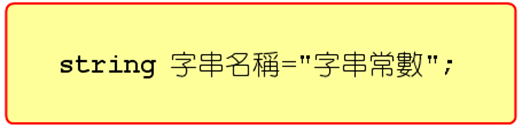

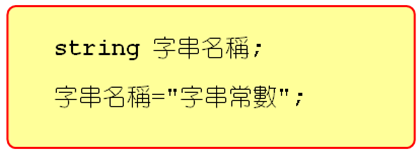

下面的範例為合法的字串宣告

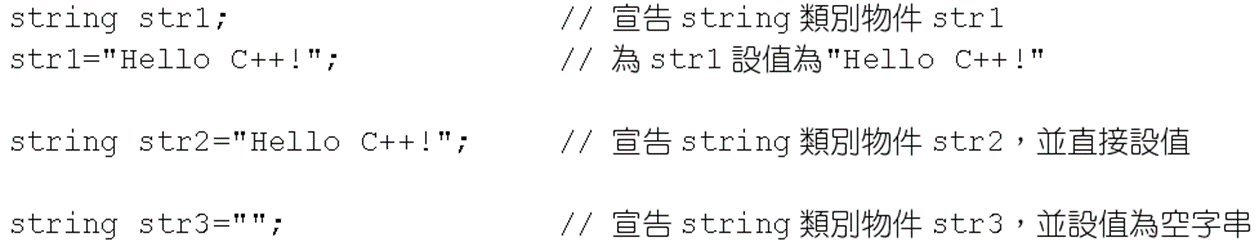

下表整理出常用的格式，並將該格式及對應的範例列出

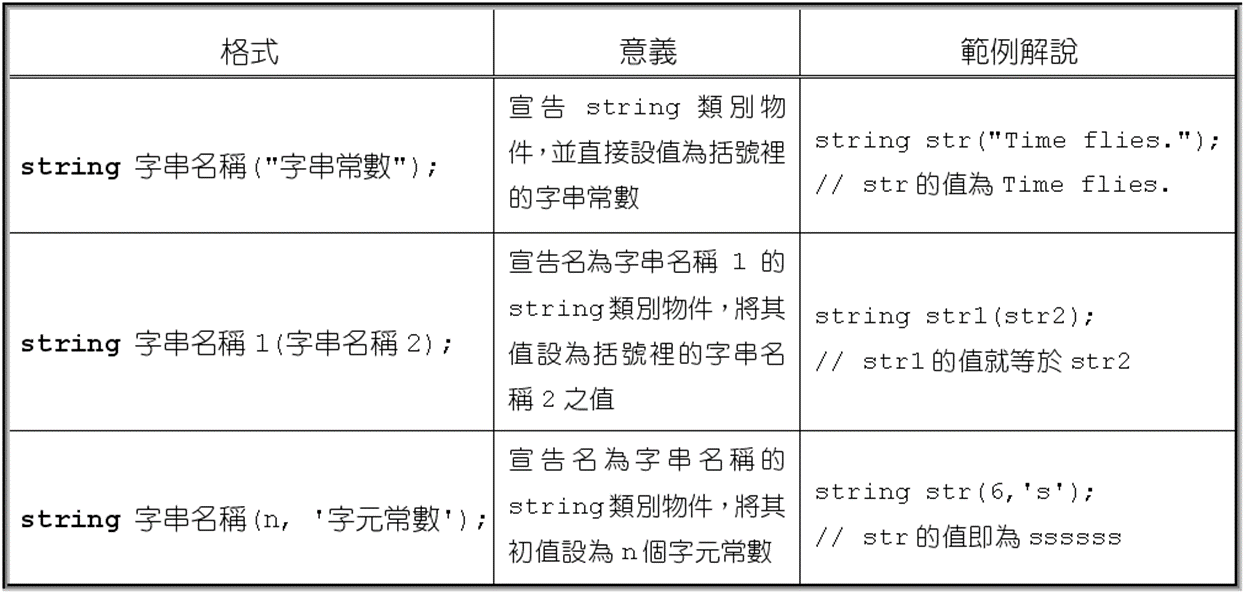

length() 函數是string類別裡用來取得物件長度的函數，其用法如下，句點是成員存取運算子（member access operator） 。


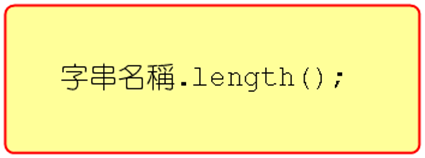

下面是印出空字元陣列及空字串的長度的範例：

In [ ]:
%%cuda
// prog8_15, 印出空字元陣列及空字串的長度
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   char str1[] = "";
   string str2;

   cout << "str1 = " << str1 << endl;
   cout << "sizeof(str1) = " << sizeof(str1) << endl;
   cout << "str2 = " << str2 << endl;
   cout << "length = " << str2.length() << endl;
   // system("pause");
   return 0;
}


#8.5.2 字串的輸出與輸入 ：prog8_16 (Page 8-37)

C++型態字串與數值混合輸入的範例如下：

getline()的使用格式

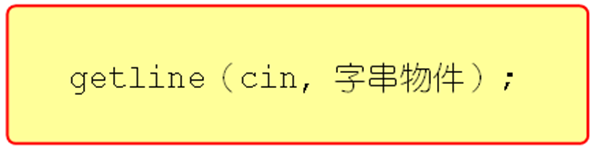

想由使用者輸入含有空白的字串，可以寫出如下的敘述

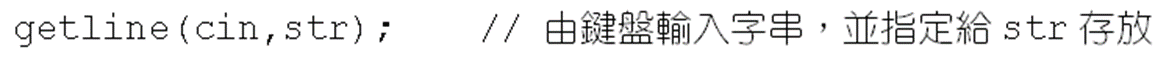

In [ ]:
%%cuda
// prog8_16, C++型態字串與數值混合輸入
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int num;
   string proverb;
   cout << "輸入欲重複的次數: ";
   (cin >> num).get();
   cout << "輸入欲列印的字串: ";
   getline(cin, proverb);
   for(int i = 1; i <= num; i++)
      cout << proverb << endl;

   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog8_16.cpp
// prog8_16, C++型態字串與數值混合輸入
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int num;
   string proverb;
   cout << "輸入欲重複的次數: ";
   (cin >> num).get();
   cout << "輸入欲列印的字串: ";
   getline(cin, proverb);
   for(int i = 1; i <= num; i++)
      cout << proverb << endl;

   // system("pause");
   return 0;
}

In [ ]:
!g++ prog8_16.cpp -o prog8_16

In [ ]:
!./prog8_16

#8.6 字串的處理

#8.6.1 字串的運算

常用的字串運算子

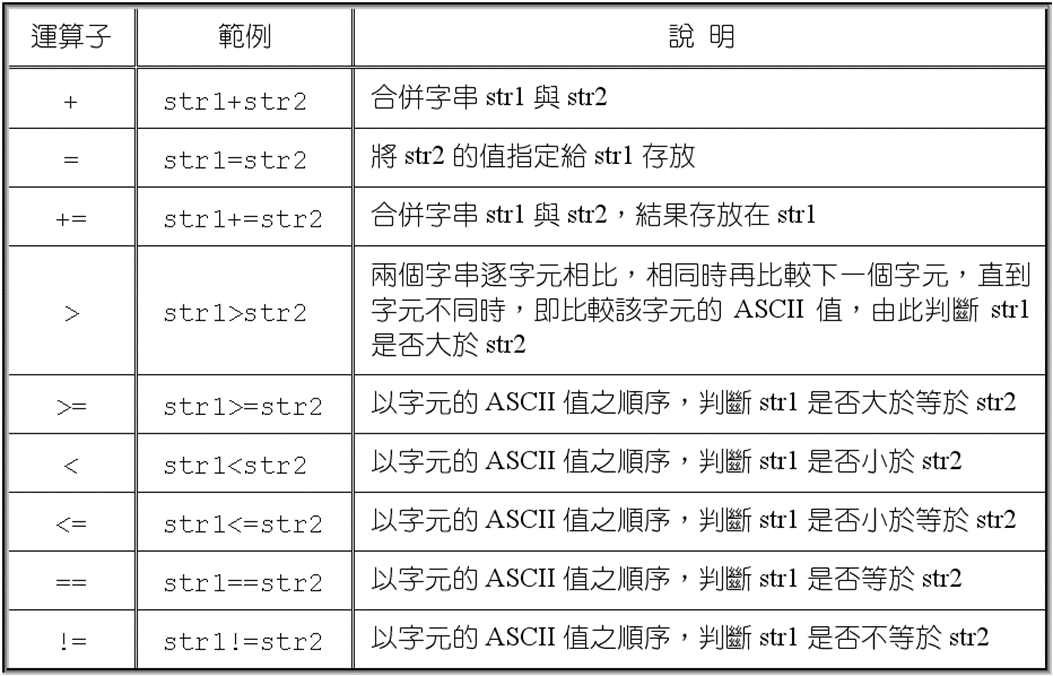

#8.6.1 字串的運算 ：prog8_17 (Page 8-39)

舉一個簡單的例子來說明字串的運算的範例如下：



In [ ]:
%%cuda
// prog8_17, 字串的運算
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string first = "Junie";
   string last = "Hong";
   cout << "full name = " << first+" "+last << endl;
   first += " ";          // first加上" "
   first += last;         // first=first+last
   cout << "full name = " << first << endl;

   // system("pause");
   return 0;
}

#8.6.2 字串類別裡的成員函數

下面列出常用的字串處理函數

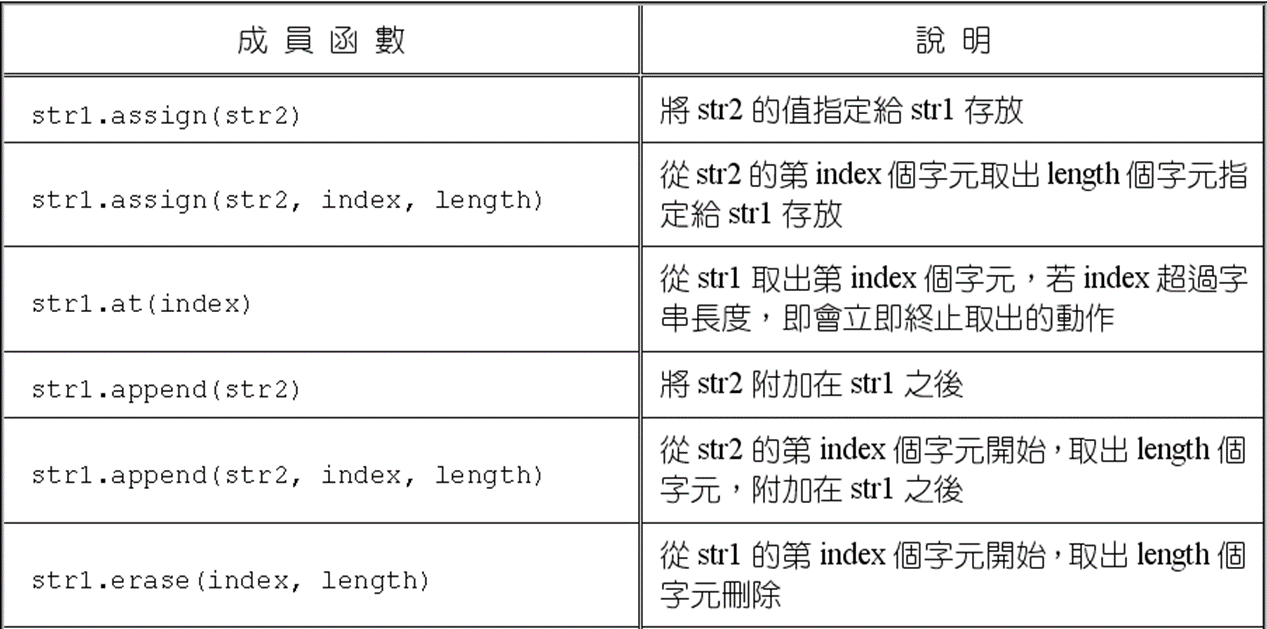

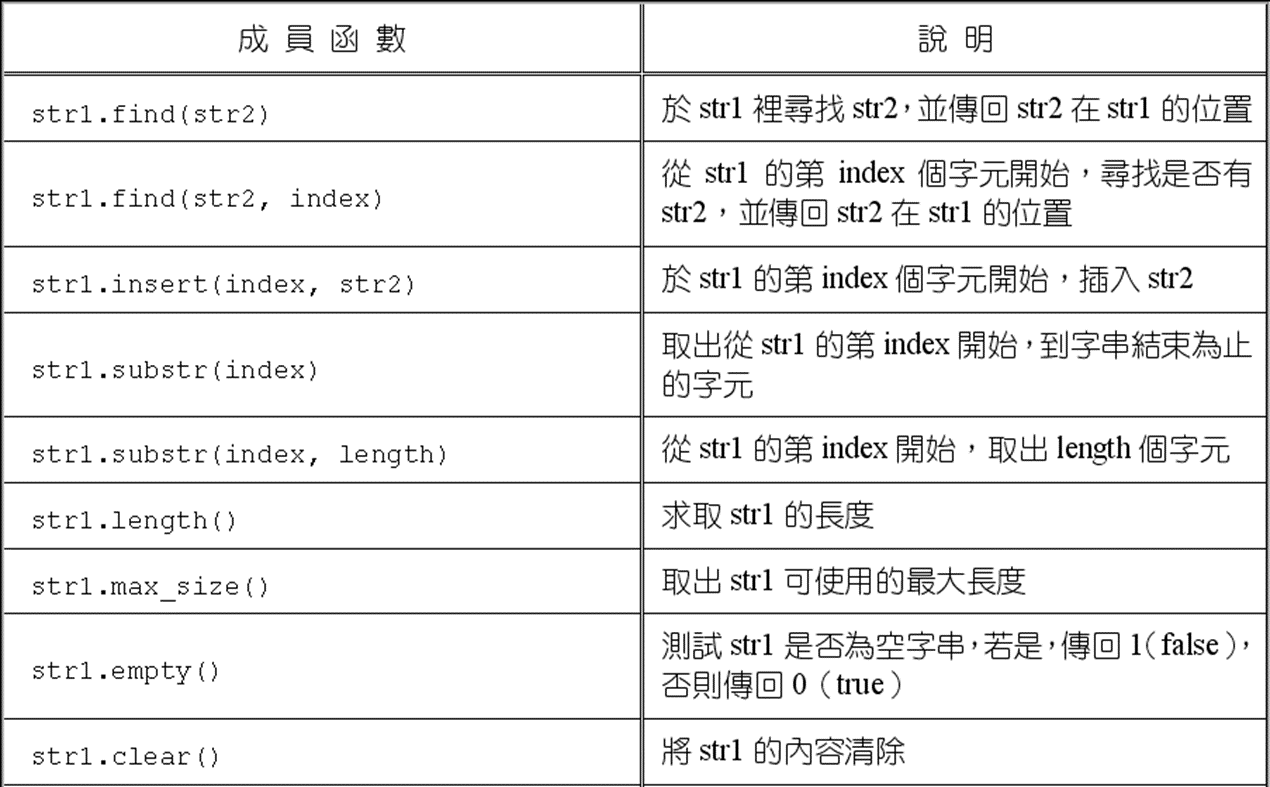

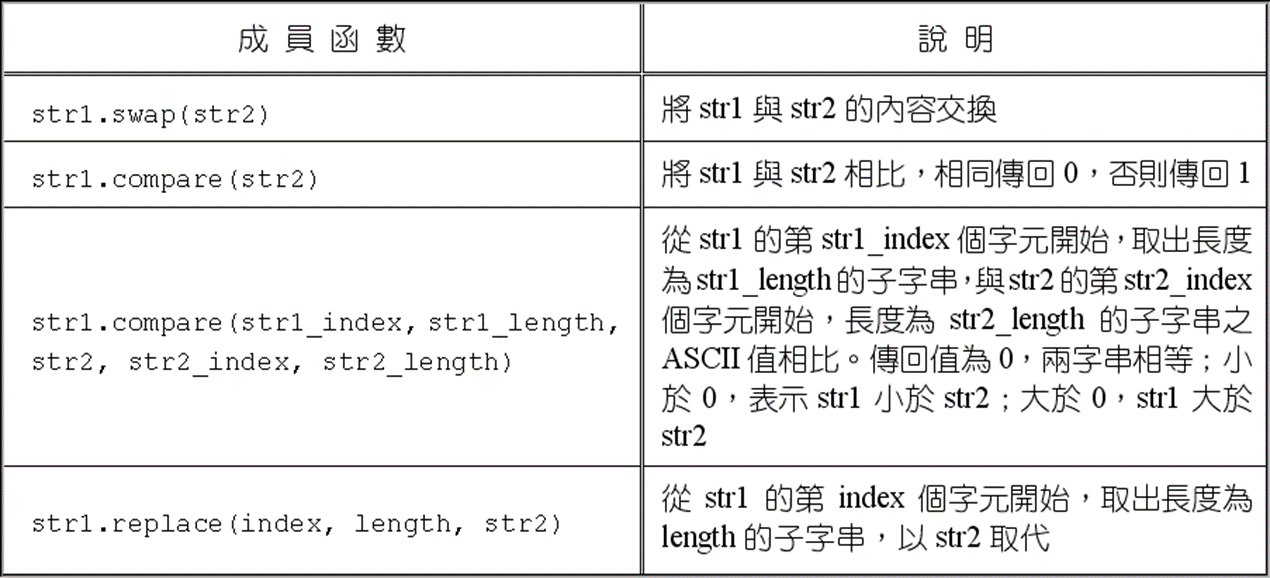

#8.6.2 字串類別裡的成員函數：prog8_18 (Page 8-41, 8-42)

下面的範例是字串處理函數的運作：



In [ ]:
%%cuda
// prog8_18, 字串函數的練習
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string str1="Hank ";
   string str2="Wang";
   string str3=", 2024/11/26";
   cout << "str1 = " << str1 << ", str2 = " << str2;
   cout << ", str3 = " << str3 << endl;
   cout << "執行str1.append(str2)" << endl;
   str1.append(str2);
   cout << "str1 = " << str1 << endl;
   cout << "執行str1.append(str3,0,6)" << endl;
   str1.append(str3,0,6);
   cout << "str1 = " << str1 << endl;
   cout << "取出str1第5個字元之後的子字串 --> ";
   cout << str1.substr(5) << endl;
   cout << "str1長度 = " << str1.length() << endl;

   // system("pause");
   return 0;
}

#8.7 字串陣列

#8.7.1 C型態字串陣列：

字串陣列的宣告及初值設定的格式如下

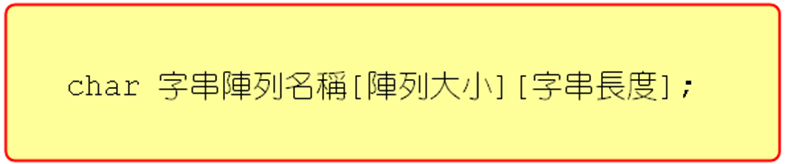

或是在宣告陣列時直接設值

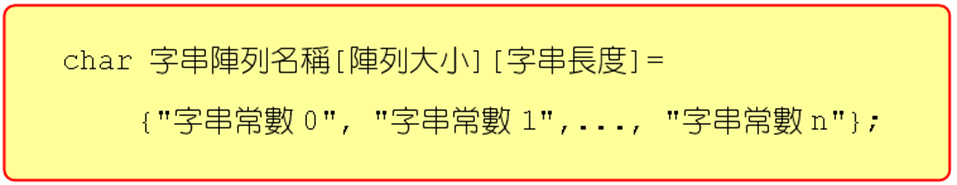

下面的範例為合法的字串陣列之宣告   

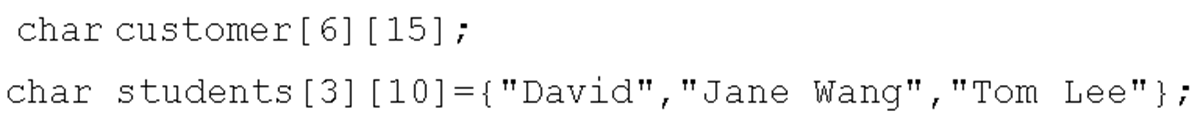

#8.7.1 C型態字串陣列：prog8_19 (Page 8-44, 8-45)

下面的程式印出字串陣列的內容範例：


In [ ]:
%%cuda
// prog8_19, 字串陣列
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i;
   char name[3][10] = {"David","Jane Wang","Tom Lee"};
   for(i = 0; i < 3; i++)		               // 印出字串陣列內容
      cout << "name[" << i << "] = " << name[i] << endl;
   cout << endl;
   for(i = 0; i < 3; i++)		               // 印出字串陣列元素的位址
   {
      cout << "address of name[" << i << "] = " << &name[i] << endl;
      cout << "address of name[" << i << "][0] = ";
      cout << (name+i) << endl << endl;
   }

   // system("pause");
   return 0;
}

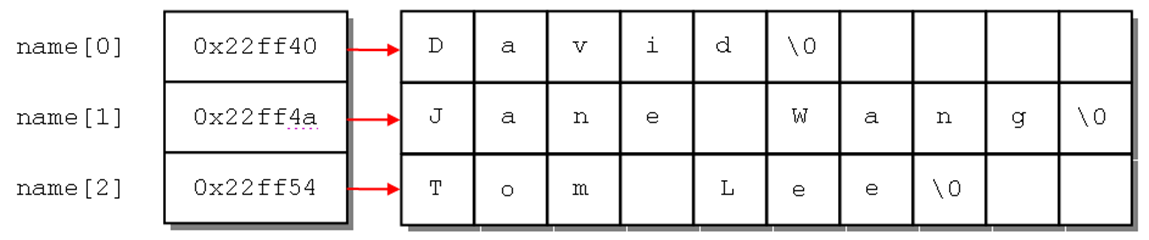

#8.7.1 C型態字串陣列：prog8_20 (Page 8-46)

下面的程式是練習字串陣列的輸入與輸出範例：


In [ ]:
%%cuda
// prog8_20, 字串陣列
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i;
   char students[3][15];
   for(i = 0; i < 3; i++)
   {
      cout << "Input student" << i << "'s name:";
      cin.getline(students[i],15);
   }
   cout << "***OUTPUT***" << endl;
   for(i=0;i<3;i++)
      cout << "students[" << i << "] = " << students[i] << endl;

   // system("pause");
   return 0;
}

#8.7.2 C++型態的字串陣列：prog8_21 (Page 8-47)

下面的程式將字串陣列的內容複製到另一個字串陣列裡的範例：


In [ ]:
%%cuda
// prog8_21, 字串陣列的複製
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int i, j;
   string students[3] = {"David","Jane Wang","Tom Lee"};
   string copystr[3];
   for(i = 0; i < 3; i++)           // 將陣列students的內容複製到copystr
      copystr[i] = students[i];

   for(i = 0; i < 3; i++)           // 印出陣列copystr的內容
      cout << "copystr[" << i << "] = " << copystr[i] << endl;

   // system("pause");
   return 0;
}



---



# 習題：8.1 一維陣列：



### hw8_1. 試撰寫一程式，找出一維陣列元素最大值與最小值的註標，並計算最大值與最小值的差與和：



In [ ]:
%%cuda
// hw8_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{


   int length = sizeof(A) / sizeof(int);
   int mina = 0, maxa = 0;
   cout << "elements in array A are ";
   for(i = 0; i < length; i++)
   {
      cout << A[i] << " ";
      if(A[i] > max)
      {


      }
      if(A[i] < min)
      {



      }
   }
   cout  << endl;
   cout  << "最大值註標A[" << maxa << "]" << endl;
   cout  << "最小值註標A["  << mina << "]" << endl;
   cout  << "差為 " << max - min << endl;
   cout  << "和為 " << max + min << endl;

   // system("pause");
   return 0;
 }

/* output------------------------------------
elements in array A are 75 30 17 62
最大值註標A[1]
最小值註標A[3]
差為 58
和為 92
-------------------------------------------*/

In [ ]:
%%writefile hw8_1.cpp
// hw8_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{


   int length = sizeof(A) / sizeof(int);
   int mina = 0, maxa = 0;
   cout << "elements in array A are ";
   for(i = 0; i < length; i++)
   {
      cout << A[i] << " ";
      if(A[i] > max)
      {


      }
      if(A[i] < min)
      {



      }
   }
   cout  << endl;
   cout  << "最大值註標A[" << maxa << "]" << endl;
   cout  << "最小值註標A["  << mina << "]" << endl;
   cout  << "差為 " << max - min << endl;
   cout  << "和為 " << max + min << endl;

   // system("pause");
   return 0;
 }

/* output------------------------------------
elements in array A are 75 30 17 62
最大值註標A[1]
最小值註標A[3]
差為 58
和為 92
-------------------------------------------*/

In [ ]:
!g++ hw8_1.cpp -o hw8_1

In [ ]:
!./hw8_1


### hw8_2. 試撰寫一程式，將兩個各有5個整數的陣列，合併成一個由大至小排列的新陣列，新陣列長度為10：



In [ ]:
%%cuda
// hw8_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define SIZE 5
#define SIZE1 10
void print_matrix(int a[], int), bubble(int b[]);
int main(void)
{
   int i;




   cout << "Before process..." << endl;
   print_matrix(data1, SIZE);
   print_matrix(data2, SIZE);
   for(i = 0; i < 5; i++)          // 將陣列data1與data2合併成data3
   {
      data3[i] = data1[i];
      data3[i + 5] = data2[i];
   }
   bubble(data3);
   cout << "After process..." << endl;
   print_matrix(data3, SIZE1);

   // system("pause");
   return 0;
}

void print_matrix(int a[], int size)    // 印出陣列內容
{
    int i;
    for(i = 0; i < size; i++)
       cout << a[i] << " ";
    cout << endl;
    return;
 }

 void bubble(int b[])                  // 排序
 {
    int i, j, temp;
    for(i = 1; i < SIZE1; i++)
       for(j = 0; j < (SIZE1 - i); j++)
          if(b[j] > b[ j + 1])
          {
            temp = b[j];
             b[j] = b[j + 1];
             b[j + 1] = temp;
          }
     return;
  }

/* output---------------------
Before process...
26 5 7 63 81
1 9 52 64 40
After process...
1 5 7 9 26 40 52 63 64 81
----------------------------*/

In [ ]:
%%writefile hw8_2.cpp
// hw8_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define SIZE 5
#define SIZE1 10
void print_matrix(int a[], int), bubble(int b[]);
int main(void)
{
   int i;




   cout << "Before process..." << endl;
   print_matrix(data1, SIZE);
   print_matrix(data2, SIZE);
   for(i = 0; i < 5; i++)          // 將陣列data1與data2合併成data3
   {
      data3[i] = data1[i];
      data3[i + 5] = data2[i];
   }
   bubble(data3);
   cout << "After process..." << endl;
   print_matrix(data3, SIZE1);

   // system("pause");
   return 0;
}

void print_matrix(int a[], int size)    // 印出陣列內容
{
    int i;
    for(i = 0; i < size; i++)
       cout << a[i] << " ";
    cout << endl;
    return;
 }

 void bubble(int b[])                  // 排序
 {
    int i, j, temp;
    for(i = 1; i < SIZE1; i++)
       for(j = 0; j < (SIZE1 - i); j++)
          if(b[j] > b[ j + 1])
          {
            temp = b[j];
             b[j] = b[j + 1];
             b[j + 1] = temp;
          }
     return;
  }

/* output---------------------
Before process...
26 5 7 63 81
1 9 52 64 40
After process...
1 5 7 9 26 40 52 63 64 81
----------------------------*/

In [ ]:
!g++ hw8_2.cpp -o hw8_2

In [ ]:
!./hw8_2


### hw8_3. 試撰寫一程式，由鍵盤輸入5個倍精度浮點數存放到陣列，並計算其平均值：



In [ ]:
%%cuda
// hw8_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#define MAX 5
using namespace std;
int main(void)
{
   double a[MAX];
   int i = 0;
   float sum = 0.0f;
   cout << "請輸入五個浮點數" << endl;
   for(i = 0; i < MAX; i++)
   {
      cout << "Input number #" << i + 1 << ": ";

   }
   for(i = 0; i < MAX; i++)
      sum += a[i];
   cout << "Average of all is " << sum / MAX << endl;

   // system("pause");
   return 0;
}

/* output------------------
請輸入五個浮點數
Input number #1: 3.65
Input number #2: 9.58
Input number #3: 23.145
Input number #4: 1.784
Input number #5: 6.91
Average of all is 9.0138
-------------------------*/

In [ ]:
%%writefile hw8_3.cpp
// hw8_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#define MAX 5
using namespace std;
int main(void)
{
   double a[MAX];
   int i = 0;
   float sum = 0.0f;
   cout << "請輸入五個浮點數" << endl;
   for(i = 0; i < MAX; i++)
   {
      cout << "Input number #" << i + 1 << ": ";

   }
   for(i = 0; i < MAX; i++)
      sum += a[i];
   cout << "Average of all is " << sum / MAX << endl;

   // system("pause");
   return 0;
}

/* output------------------
請輸入五個浮點數
Input number #1: 3.65
Input number #2: 9.58
Input number #3: 23.145
Input number #4: 1.784
Input number #5: 6.91
Average of all is 9.0138
-------------------------*/

In [ ]:
!g++ hw8_3.cpp -o hw8_3

In [ ]:
!./hw8_3


### hw8_4. 如果事先並不知道要輸入多少資料時，可以利用do-while迴圈，判斷當輸入值符合條件時才得以繼續輸入。試撰寫一程式，輸入全班同學的成績並計算平均值，當成績為-1時即結束輸入。學生人數最多設定為100個：



In [ ]:
%%cuda
// hw8_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define MAX 100
int main(void)
{
   int score[MAX];
   int i = 0, num;
   double sum = 0.0;
   cout << "Enter -1 stopping input!!" << endl;
   do
   {
      cout << "Input score:";

   } while(         );   	// 輸入成績，輸入-1時結束
   num = i - 1;
   for(i = 0; i < num; i++)
      sum += score[i];			// 計算平均成績
   cout << "Average of all is " << sum/num << endl;

   // system("pause");
   return 0;
}

/* output------------------
Enter -1 stopping input!!
Input score:85
Input score:76
Input score:61
Input score:48
Input score:96
Input score:-1
Average of all is 73.2
-------------------------*/

In [ ]:
%%writefile hw8_4.cpp
// hw8_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define MAX 100
int main(void)
{
   int score[MAX];
   int i = 0, num;
   double sum = 0.0;
   cout << "Enter -1 stopping input!!" << endl;
   do
   {
      cout << "Input score:";

   } while(         );   	// 輸入成績，輸入-1時結束
   num = i - 1;
   for(i = 0; i < num; i++)
      sum += score[i];			// 計算平均成績
   cout << "Average of all is " << sum/num << endl;

   // system("pause");
   return 0;
}

/* output------------------
Enter -1 stopping input!!
Input score:85
Input score:76
Input score:61
Input score:48
Input score:96
Input score:-1
Average of all is 73.2
-------------------------*/

In [ ]:
!g++ hw8_4.cpp -o hw8_4

In [ ]:
!./hw8_4

# 習題：8.2 二維以上的多維陣列


### hw8_5. 假設某一公司有五種產品A、B、C、D與E，其單價分別為12、16、10、14與15元；而該公司共有三位銷售員，他們在某個月份的銷售量如下所示：



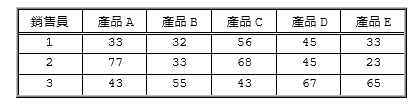


試寫一程式來計算：

(a) 每一個銷售員的銷售總金額。

(b) 每一項產品的銷售總金額。

(c) 有最好業績（銷售總金額為最多者）的銷售員。

(d) 銷售總金額為最多的產品。


In [ ]:
%%cuda
// hw8_5, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i, j, sum[3] = {0}, sum1[5] = {0};
   int maxs = sum[0];
   int maxp = sum1[0];
   int s = 0, p = 0;



   for(i = 0; i < 3; i++)
   {
      cout << "銷售員" << (i+1) << "的銷售量為 ";
      for(j=0;j<5;j++)
         cout << sale[i][j] << " ";
      cout << endl;
   }
   cout << endl;
   cout << "(a)每個銷售員銷售總金額如下: " << endl;
   for(i = 0; i < 3; i++)
   {
      for(j = 0; j < 5; j++)
         sum[i] = sum[i] + sale[i][j] * product[j] ;
      cout << "銷售員" << i+1 << "的銷售總金額 " << sum[i] << endl;
   }
   cout << endl << "(b)每項產品銷售總金額如下: " << endl;
   for(j = 0; j < 5; j++)
   {
       for(i = 0; i < 3; i++)
          sum1[j] = sum1[j] + sale[i][j] * product[j];
       cout << "產品" << char(j + 65);
       cout << "的銷售總金額 " << sum1[j] << endl;
    }
    for(i = 0; i < 3; i++)
       if(sum[i] > maxs)
       {
          maxs = sum[i];
          s = i;
       }
    cout << endl << "(c)業績最好的銷售員: ";
    cout << "銷售員" << s + 1 << endl;

     for(j = 0; j < 5; j++)
        if(sum1[j] > maxp)
        {
           maxp = sum1[j];
           p = j;
        }
     cout << endl << "(d)銷售金額最多的產品: ";
     cout << "產品" << char(p+65) << endl;

     // system(“pause”);
     return 0;
}
/* output--------------------------
銷售員1的銷售量為 33 32 56 45 33
銷售員2的銷售量為 77 33 68 45 23
銷售員3的銷售量為 43 55 43 67 65

(a)每個銷售員銷售總金額如下:
銷售員1的銷售總金額 2593
銷售員2的銷售總金額 3107
銷售員3的銷售總金額 3739

(b)每項產品銷售總金額如下:
產品A的銷售總金額 1836
產品B的銷售總金額 1920
產品C的銷售總金額 1670
產品D的銷售總金額 2198
產品E的銷售總金額 1815

(c)業績最好的銷售員: 銷售員3

(d)銷售金額最多的產品: 產品D
---------------------------------*/

In [ ]:
%%writefile hw8_5.cpp
// hw8_5, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i, j, sum[3] = {0}, sum1[5] = {0};
   int maxs = sum[0];
   int maxp = sum1[0];
   int s = 0, p = 0;



   for(i = 0; i < 3; i++)
   {
      cout << "銷售員" << (i+1) << "的銷售量為 ";
      for(j=0;j<5;j++)
         cout << sale[i][j] << " ";
      cout << endl;
   }
   cout << endl;
   cout << "(a)每個銷售員銷售總金額如下: " << endl;
   for(i = 0; i < 3; i++)
   {
      for(j = 0; j < 5; j++)
         sum[i] = sum[i] + sale[i][j] * product[j] ;
      cout << "銷售員" << i+1 << "的銷售總金額 " << sum[i] << endl;
   }
   cout << endl << "(b)每項產品銷售總金額如下: " << endl;
   for(j = 0; j < 5; j++)
   {
       for(i = 0; i < 3; i++)
          sum1[j] = sum1[j] + sale[i][j] * product[j];
       cout << "產品" << char(j + 65);
       cout << "的銷售總金額 " << sum1[j] << endl;
    }
    for(i = 0; i < 3; i++)
       if(sum[i] > maxs)
       {
          maxs = sum[i];
          s = i;
       }
    cout << endl << "(c)業績最好的銷售員: ";
    cout << "銷售員" << s + 1 << endl;

     for(j = 0; j < 5; j++)
        if(sum1[j] > maxp)
        {
           maxp = sum1[j];
           p = j;
        }
     cout << endl << "(d)銷售金額最多的產品: ";
     cout << "產品" << char(p+65) << endl;

     // system(“pause”);
     return 0;
}
/* output--------------------------
銷售員1的銷售量為 33 32 56 45 33
銷售員2的銷售量為 77 33 68 45 23
銷售員3的銷售量為 43 55 43 67 65

(a)每個銷售員銷售總金額如下:
銷售員1的銷售總金額 2593
銷售員2的銷售總金額 3107
銷售員3的銷售總金額 3739

(b)每項產品銷售總金額如下:
產品A的銷售總金額 1836
產品B的銷售總金額 1920
產品C的銷售總金額 1670
產品D的銷售總金額 2198
產品E的銷售總金額 1815

(c)業績最好的銷售員: 銷售員3

(d)銷售金額最多的產品: 產品D
---------------------------------*/

In [ ]:
!g++ hw8_5.cpp -o hw8_5

In [ ]:
!./hw8_5

### hw8_6. 試撰寫一程式，找出二維陣列中最小值的註標，印出這個註標的值。陣列的大小與內容請自行設定：



In [ ]:
%%cuda
// hw8_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int a[2][3]={{51,5,6},{3,8,25}};
   int min=a[0][0];
   int i,j,min1,min2;
   for(i=0;i<2;i++)
      for(j=0;j<3;j++)
      {
         cout << "a[" << i << "][" << j << "] = ";
         cout << a[i][j] << endl;






      }
   cout << endl;
   cout << "最小值註標為" << "[" << min1 << "][" << min2 << "]";
   cout << ", 其值為 " << min << endl;

   // system("pause");
   return 0;
}

/* output--------------------
a[0][0] = 51
a[0][1] = 5
a[0][2] = 6
a[1][0] = 3
a[1][1] = 8
a[1][2] = 25

最小值註標為[1][0], 其值為 3
---------------------------*/

In [ ]:
%%writefile hw8_6.cpp
// hw8_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int a[2][3]={{51,5,6},{3,8,25}};
   int min=a[0][0];
   int i,j,min1,min2;
   for(i=0;i<2;i++)
      for(j=0;j<3;j++)
      {
         cout << "a[" << i << "][" << j << "] = ";
         cout << a[i][j] << endl;






      }
   cout << endl;
   cout << "最小值註標為" << "[" << min1 << "][" << min2 << "]";
   cout << ", 其值為 " << min << endl;

   // system("pause");
   return 0;
}

/* output--------------------
a[0][0] = 51
a[0][1] = 5
a[0][2] = 6
a[1][0] = 3
a[1][1] = 8
a[1][2] = 25

最小值註標為[1][0], 其值為 3
---------------------------*/

In [ ]:
!g++ hw8_6.cpp -o hw8_6

In [ ]:
!./hw8_6

### hw8_7. 請宣告一個2 x 2 x 2的三維陣列，於宣告陣列時即設定初值，再將其元素值印出並計算總和。陣列元素值請自行設定：



In [ ]:
%%cuda
// hw8_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   int i,j,k,sum=0;
   for(i=0;i<2;i++)	    // 印出陣列內容並計算總和
      for(j=0;j<2;j++)
         for(k=0;k<2;k++)
         {
            cout << "A[" << i << "][" << j << "][" << k << "] = ";
            cout << A[i][j][k] << endl;

         }
   cout << "sum = " << sum << endl;

   // system("pause");
   return 0;
}

/* output---------
A[0][0][0] = 95
A[0][0][1] = 85
A[0][1][0] = 66
A[0][1][1] = 78
A[1][0][0] = 89
A[1][0][1] = 77
A[1][1][0] = 60
A[1][1][1] = 83
sum = 633
----------------*/

In [ ]:
%%writefile hw8_7.cpp
// hw8_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   int i,j,k,sum=0;
   for(i=0;i<2;i++)	    // 印出陣列內容並計算總和
      for(j=0;j<2;j++)
         for(k=0;k<2;k++)
         {
            cout << "A[" << i << "][" << j << "][" << k << "] = ";
            cout << A[i][j][k] << endl;

         }
   cout << "sum = " << sum << endl;

   // system("pause");
   return 0;
}

/* output---------
A[0][0][0] = 95
A[0][0][1] = 85
A[0][1][0] = 66
A[0][1][1] = 78
A[1][0][0] = 89
A[1][0][1] = 77
A[1][1][0] = 60
A[1][1][1] = 83
sum = 633
----------------*/

In [ ]:
!g++ hw8_7.cpp -o hw8_7

In [ ]:
!./hw8_7

### hw8_8. 複習一下矩陣是如何相乘的。矩陣m×n階的矩陣與n×p階的矩陣相乘，會得到m×p階的矩陣，如下列的運算所示：：



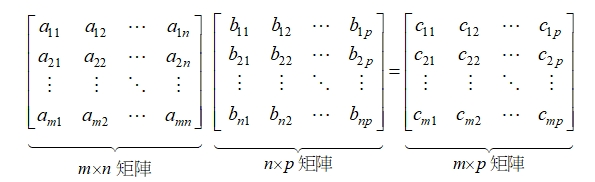

矩陣內各元素是依照下列的法則來相乘的：

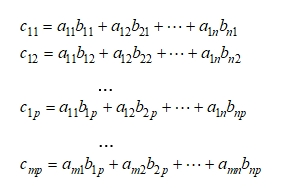

試撰寫一程式，於程式中宣告出如下面的陣列：


```
int a[][]={{3,2,1},{5,6,7},{2,4,6}};
int b[][]={{2,3},{3,4},{6,2}};
int c[][]={0};
```


再將陣列a乘以陣列b，將a*b的結果放在陣列c後，印出陣列c的內容。


In [ ]:
%%cuda
// hw8_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int a[3][3]={{3,2,1},{5,6,7},{2,4,6}};
   int b[3][2]={{2,3},{3,4},{6,2}};
   int c[3][2]={0};

   for(int i=0;i<3;i++)
      for(int j=0;j<2;j++)
      {
         for(int k=0;k<3;k++)

         cout << "c["<<i<<"]["<<j<<"] = "<<c[i][j]<< endl;
      }

   // system("pause");
   return 0;
}

/* output------
c[0][0] = 18
c[0][1] = 19
c[1][0] = 70
c[1][1] = 53
c[2][0] = 52
c[2][1] = 34
-------------*/

In [ ]:
%%writefile hw8_8.cpp
// hw8_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int a[3][3]={{3,2,1},{5,6,7},{2,4,6}};
   int b[3][2]={{2,3},{3,4},{6,2}};
   int c[3][2]={0};

   for(int i=0;i<3;i++)
      for(int j=0;j<2;j++)
      {
         for(int k=0;k<3;k++)

         cout << "c["<<i<<"]["<<j<<"] = "<<c[i][j]<< endl;
      }

   // system("pause");
   return 0;
}

/* output------
c[0][0] = 18
c[0][1] = 19
c[1][0] = 70
c[1][1] = 53
c[2][0] = 52
c[2][1] = 34
-------------*/

In [ ]:
!g++ hw8_8.cpp -o hw8_8

In [ ]:
!./hw8_8

# 習題：8.3 傳遞陣列給函數

### hw8_9. 試撰寫一函數，傳入一個一維陣列，尋找並傳回該陣列的最大值，並測試此函數。


In [ ]:
%%cuda
// hw8_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int find_max(    );
int main(void)
{
   int a[4] = {2,8,50,7};
   cout << "陣列內容為 ";
   for(int i = 0; i < 4; i++)
      cout << a[i] << " ";
   cout << endl << "最大值為 " << find_max(a) << endl;

   // system("pause");
   return 0;
}

int find_max(    )
{
   int i, max = a[0];
   for(i = 0; i < 4; i++)
      if(max < a[i])
         max = a[i];
   return max;
}

/* output---------
陣列內容為 2 8 7
最大值為 50
----------------*/

In [ ]:
%%writefile hw8_9.cpp
// hw8_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int find_max(    );
int main(void)
{
   int a[4] = {2,8,50,7};
   cout << "陣列內容為 ";
   for(int i = 0; i < 4; i++)
      cout << a[i] << " ";
   cout << endl << "最大值為 " << find_max(a) << endl;

   // system("pause");
   return 0;
}

int find_max(    )
{
   int i, max = a[0];
   for(i = 0; i < 4; i++)
      if(max < a[i])
         max = a[i];
   return max;
}

/* output---------
陣列內容為 2 8 7
最大值為 50
----------------*/

In [ ]:
!g++ hw8_9.cpp -o hw8_9

In [ ]:
!./hw8_9

### hw8_10. 試撰寫一個可接收一維陣列的函數，並印出最大值與最小值的註標，同時可傳回最大值與最小值的差值：


In [ ]:
%%cuda
// hw8_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int diff(    );
int main(void)
{
   int a[] = {48,75,30,17,62};
   cout << "陣列內容為 ";
   for(int i = 0; i < sizeof(a) / sizeof(int); i++)
      cout << a[i] << " ";
   cout << endl;
   cout << "差為 " << diff(a) << endl;

   // system("pause");
   return 0;
}

int diff(int a[])
{
   int i, maxa, max = a[0], mina, min = a[0];
   for(i = 0; i < 5; i++)
   {
      if(a[i] > max)
      {
         max = a[i];
         maxa = i;
      }
      if(a[i] < min)
      {
         min = a[i];
         mina = i;
       }
    }
    cout << "最大值註標 [" << maxa << "]" << endl;
    cout << "最小值註標 ["  << mina << "]" << endl;
    return (     );
 }

/* output----------------
陣列內容為 75 30 17 62
最大值註標 [1]
最小值註標 [3]
差為 58
-----------------------*/

In [ ]:
%%writefile hw8_10.cpp
// hw8_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int diff(    );
int main(void)
{
   int a[] = {48,75,30,17,62};
   cout << "陣列內容為 ";
   for(int i = 0; i < sizeof(a) / sizeof(int); i++)
      cout << a[i] << " ";
   cout << endl;
   cout << "差為 " << diff(a) << endl;

   // system("pause");
   return 0;
}

int diff(int a[])
{
   int i, maxa, max = a[0], mina, min = a[0];
   for(i = 0; i < 5; i++)
   {
      if(a[i] > max)
      {
         max = a[i];
         maxa = i;
      }
      if(a[i] < min)
      {
         min = a[i];
         mina = i;
       }
    }
    cout << "最大值註標 [" << maxa << "]" << endl;
    cout << "最小值註標 ["  << mina << "]" << endl;
    return (     );
 }

/* output----------------
陣列內容為 75 30 17 62
最大值註標 [1]
最小值註標 [3]
差為 58
-----------------------*/

In [ ]:
!g++ hw8_10.cpp -o hw8_10

In [ ]:
!./hw8_10

### hw8_11. 設計一函數，找出二維陣列最小值的註標，並傳回最小值：



In [ ]:
%%cuda
// hw8_11, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int find_min(      );
int main(void)
{
   int a[3][3]={{21,85,39},
          {30,72,14},
          {69,53,41}};
   cout << "陣列內容為" << endl;
   for(int i = 0; i < 3; i++)
   {
      for(int j = 0; j < 3; j++)
         cout << a[i][j] << " ";
      cout << endl;
   }
   cout << "二維陣列中, 最小值為 " << find_min(a) << endl;

   // system(“pause”);
   return 0;
}

int find_min(       )
{
   int i, j, n, m, min = a[0][0];
   for(i = 0; i < 3; i++)
      for(j = 0; j < 3; j++)
         if(a[i][j] < min)
         {
            min = a[i][j];
            n = i;
            m = j;
         }
    cout << "註標值為 [" << n << "][" << m << "]" << endl;
    return min;
 }

/* output--------------------------
陣列內容為
21 85 39
30 72 14
69 53 41
註標值為 [1][2]
二維陣列中, 最小值為 14
---------------------------------*/

In [ ]:
%%writefile hw8_11.cpp
// hw8_11, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int find_min(      );
int main(void)
{
   int a[3][3]={{21,85,39},
          {30,72,14},
          {69,53,41}};
   cout << "陣列內容為" << endl;
   for(int i = 0; i < 3; i++)
   {
      for(int j = 0; j < 3; j++)
         cout << a[i][j] << " ";
      cout << endl;
   }
   cout << "二維陣列中, 最小值為 " << find_min(a) << endl;

   // system(“pause”);
   return 0;
}

int find_min(       )
{
   int i, j, n, m, min = a[0][0];
   for(i = 0; i < 3; i++)
      for(j = 0; j < 3; j++)
         if(a[i][j] < min)
         {
            min = a[i][j];
            n = i;
            m = j;
         }
    cout << "註標值為 [" << n << "][" << m << "]" << endl;
    return min;
 }

/* output--------------------------
陣列內容為
21 85 39
30 72 14
69 53 41
註標值為 [1][2]
二維陣列中, 最小值為 14
---------------------------------*/

In [ ]:
!g++ hw8_11.cpp -o hw8_11

In [ ]:
!./hw8_11

### hw8_12. 試撰寫一程式，將一維陣列當成引數傳遞到count() 函數中，計算陣列中的奇數及偶數的個數，請在呼叫count()函數前，先將陣列的內容印出：



In [ ]:
%%cuda
// hw8_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define SIZE 10
void print_matrix(     )
void count(    );
int main(void)
{
   int data[SIZE] = {51,36,88,74,45,3,98,71,63,55};
   cout << "elements in array: ";
   print_matrix(data);
   count(data);

   // system("pause");
   return 0;
}

void print_matrix(    )
{
   int i;
   for(i = 0; i < SIZE; i++)	  // 印出陣列的內容
      cout << a[i] << " ";
   cout << endl;
   return;
}

void count(      )
{
   int i, cnt1 = 0, cnt2 = 0;
   for(i = 0; i < SIZE; i++)	  // 計算陣列內的奇數及偶數個數
      if(a[i] % 2 == 1)
          cnt1++;
       else
          cnt2++;
    cout << "There are " << cnt1 << " odd";
    cout << " and " << cnt2 << " even numbers" << endl;
    return;
 }

/* output---------------------------------------
elements in array: 36 88 74 45 3 98 71 63 55
There are 6 odd and 4 even numbers
----------------------------------------------*/

In [ ]:
%%writefile hw8_12.cpp
// hw8_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define SIZE 10
void print_matrix(     )
void count(    );
int main(void)
{
   int data[SIZE] = {51,36,88,74,45,3,98,71,63,55};
   cout << "elements in array: ";
   print_matrix(data);
   count(data);

   // system("pause");
   return 0;
}

void print_matrix(    )
{
   int i;
   for(i = 0; i < SIZE; i++)	  // 印出陣列的內容
      cout << a[i] << " ";
   cout << endl;
   return;
}

void count(      )
{
   int i, cnt1 = 0, cnt2 = 0;
   for(i = 0; i < SIZE; i++)	  // 計算陣列內的奇數及偶數個數
      if(a[i] % 2 == 1)
          cnt1++;
       else
          cnt2++;
    cout << "There are " << cnt1 << " odd";
    cout << " and " << cnt2 << " even numbers" << endl;
    return;
 }

/* output---------------------------------------
elements in array: 36 88 74 45 3 98 71 63 55
There are 6 odd and 4 even numbers
----------------------------------------------*/

In [ ]:
!g++ hw8_12.cpp -o hw8_12

In [ ]:
!./hw8_12

### hw8_13. 試將二維陣列傳遞到函數後，尋找該陣列中的最大值與最小值：

In [ ]:
%%cuda
// hw8_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void search(       ,     );
int main(void)
{
   int a[4][3]={{26,15,72},{10,36,47},
                   {65,76,38},{40,49,32}};
   int i,j,result[2];
   cout << "elements in array:" << endl;   // 印出陣列的內容
   for(i=0;i<4;i++)
   {
      for(j=0;j<3;j++)
         cout << a[i][j] << " ";
      cout << endl;
   }
   search(a, result);
   cout << "maximum = " << result[0] << endl;
   cout << "minimum = " << result[1] << endl;

   // system("pause");
   return 0;
}

void search(       ,     )
{
   int i,j,max=a[0][0],min=a[0][0];
   for(i=0;i<4;i++)
      for(j=0;j<3;j++)
      {
         if(max<a[i][j])   // 尋找最大值
             max=a[i][j];
          if(min>a[i][j])   // 尋找最小值
             min=a[i][j];
       }
    b[0] = max;
    b[1] = min;
    return;
 }

/* output-------------
elements in array:
26 15 72
10 36 47
65 76 38
40 32
maximum = 76
minimum = 10
---------------------*/

In [ ]:
%%writefile hw8_13.cpp
// hw8_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void search(       ,     );
int main(void)
{
   int a[4][3]={{26,15,72},{10,36,47},
                   {65,76,38},{40,49,32}};
   int i,j,result[2];
   cout << "elements in array:" << endl;   // 印出陣列的內容
   for(i=0;i<4;i++)
   {
      for(j=0;j<3;j++)
         cout << a[i][j] << " ";
      cout << endl;
   }
   search(a, result);
   cout << "maximum = " << result[0] << endl;
   cout << "minimum = " << result[1] << endl;

   // system("pause");
   return 0;
}

void search(       ,     )
{
   int i,j,max=a[0][0],min=a[0][0];
   for(i=0;i<4;i++)
      for(j=0;j<3;j++)
      {
         if(max<a[i][j])   // 尋找最大值
             max=a[i][j];
          if(min>a[i][j])   // 尋找最小值
             min=a[i][j];
       }
    b[0] = max;
    b[1] = min;
    return;
 }

/* output-------------
elements in array:
26 15 72
10 36 47
65 76 38
40 32
maximum = 76
minimum = 10
---------------------*/

In [ ]:
!g++ hw8_13.cpp -o hw8_13

In [ ]:
!./hw8_13

# 習題：8.4 字元陣列--C型態字串



### hw8_14. 試說明 'w' 與 "w" 有何不同？：

In [ ]:
// hw8_14, 班級: 資工一  學號: xxx 姓名: xxx


In [ ]:
%%writefile hw8_14.cpp
// hw7_14, 班級: 資工一  學號: xxx 姓名: xxx


### hw8_15. 試撰寫一程式，宣告一字元陣列a，利用迴圈為陣列設值為A~Z：

In [ ]:
%%cuda
// hw8_15, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   for(int i = 0; i < 26; i++)
   {

      cout << a[i] << " ";
   }
   cout << endl;

   // system("pause");
   return 0;
}

/* output---------------------------------------------
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
----------------------------------------------------*/

In [ ]:
%%writefile hw8_15.cpp
// hw8_15, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   for(int i = 0; i < 26; i++)
   {

      cout << a[i] << " ";
   }
   cout << endl;

   // system("pause");
   return 0;
}

/* output---------------------------------------------
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
----------------------------------------------------*/

In [ ]:
!g++ hw8_15.cpp -o hw8_15

In [ ]:
!./hw8_15

### hw8_16. 試將習題15中建立的字元陣列之內容，以列印字串的方式印出：

In [ ]:
%%cuda
// hw8_16, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   for(int i = 0; i < 26; i++)

   cout << a << endl;

   // system("pause");
   return 0;
}

/* output--------------------
ABCDEFGHIJKLMNOPQRSTUVWXYZ
---------------------------*/

In [ ]:
%%writefile hw8_16.cpp
%%cuda
// hw8_16, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{

   for(int i = 0; i < 26; i++)

   cout << a << endl;

   // system("pause");
   return 0;
}

/* output--------------------
ABCDEFGHIJKLMNOPQRSTUVWXYZ
---------------------------*/

In [ ]:
!g++ hw8_16.cpp -o hw8_16

In [ ]:
!./hw8_16

### hw8_17. 試撰寫一程式，宣告一字元陣列，初值設定為英文字母a~z，再詢問使用者要印出奇位數字元還是偶位數字元，輸入1為選擇奇位數字元，即印出英文字母的奇位數字元a c e g i k m o q s u w y；輸入2為選擇偶位數字元，則印出英文字母的偶位數字元b d f h j l n p r t v x z。下面為輸出範例：



```
請選擇列印(1)奇位數字元  (2)偶位數字元: 2
偶位數字元:b d f h j l n p r t v x z
```



In [ ]:
%%cuda
// hw8_17, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i,j;
   char a[26] = {'\0'};
   for(i = 0; i < 26; i++)
      a[i] =      ;
   cout << "請選擇列印(1)奇位數字元 (2)偶位數字元: ";
   cin  >> j;
   if(j%2 == 0)
      for(i = 1; i <= 25; i += 2)
         cout << a[i] << " ";
   else
      for(i = 0; i <= 24; i+= 2)
         cout << a[i] << " ";
   cout << endl;

   // system("pause");
   return 0;
}

/* output-----------------------------
請選擇列印(1)奇位數字元 (2)偶位數字元: 1
a c e g i k m o q s u w y
------------------------------------*/

In [ ]:
%%writefile hw8_17.cpp
// hw8_17, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int i,j;
   char a[26] = {'\0'};
   for(i = 0; i < 26; i++)
      a[i] =      ;
   cout << "請選擇列印(1)奇位數字元 (2)偶位數字元: ";
   cin  >> j;
   if(j%2 == 0)
      for(i = 1; i <= 25; i += 2)
         cout << a[i] << " ";
   else
      for(i = 0; i <= 24; i+= 2)
         cout << a[i] << " ";
   cout << endl;

   // system("pause");
   return 0;
}

/* output-----------------------------
請選擇列印(1)奇位數字元 (2)偶位數字元: 1
a c e g i k m o q s u w y
------------------------------------*/

In [ ]:
!g++ hw8_17.cpp -o hw8_17

In [ ]:
!./hw8_17

### hw8_18. 試撰寫一程式，由鍵盤輸入一字串，並傳遞該字串到reverse()函數，將字串以前後顛倒的順序重新排列後，再於主程式中印出來。舉例來說，輸入的字串為"milk"，輸出即為"klim"：

In [ ]:
%%cuda
// hw8_18, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include<string>
using namespace std;
void reverse(     );
int main(void)
{
   char a[20] = {'\0'};
   cout << "Input a string: ";
   cin.getline(a,20);
   cout << "轉換前的string = " << a << endl;
   reverse(a);
   cout << "轉換後的string = " ;
   for(int i = 0; i < 20; i++)
      if(a[i] != 0)
         cout << a[i];
   cout << endl;

   // system("pause");
   return 0;
}

void reverse(char a[20])
{
   int i;
   char b[20];
   for(i = 0; i < 20; i++)

   for(i = 0; i < 20; i++)

   return ;
 }

/* output-----------
Input a string: milk
轉換前的string = milk
轉換後的string = klim
------------------*/

In [ ]:
%%writefile hw8_18.cpp
// hw8_18, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include<string>
using namespace std;
void reverse(     );
int main(void)
{
   char a[20] = {'\0'};
   cout << "Input a string: ";
   cin.getline(a,20);
   cout << "轉換前的string = " << a << endl;
   reverse(a);
   cout << "轉換後的string = " ;
   for(int i = 0; i < 20; i++)
      if(a[i] != 0)
         cout << a[i];
   cout << endl;

   // system("pause");
   return 0;
}

void reverse(char a[20])
{
   int i;
   char b[20];
   for(i = 0; i < 20; i++)

   for(i = 0; i < 20; i++)

   return ;
 }

/* output-----------
Input a string: milk
轉換前的string = milk
轉換後的string = klim
------------------*/

In [ ]:
!g++ hw8_18.cpp -o hw8_18

In [ ]:
!./hw8_18

# 習題：8.5 字串類別--C++型態字串


### hw8_19. 試撰寫一程式，由鍵盤輸入一字串後，分別計算該字串出現母音字母A、E、I、O、U及a、e、i、o、u與其它字元的次數。



In [ ]:
%%cuda
// hw8_19, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{

   int i = 0, A = 0, E = 0, I = 0, O = 0, U = 0, other = 0;
   cout << "請輸入字串: ";

   cout << "輸入的字串為 " << str << endl;
   while(str[i] != '\0')
   {
      switch(str[i])
      {
         case 'A':
         case 'a': A=A+1;
                  break;
         case 'E':
         case 'e': E=E+1;
                  break;
         case 'I':
         case 'i': I=I+1;
                  break;
         case 'O':
         case 'o': O=O+1;
                  break;
         case 'U':
         case 'u': U=U+1;
                  break;
         default : other++;
       }
       i++;
    }
    cout << "出現A,E,I,O,U字母及其它字元如下:" << endl;
    cout << "A,a = " << A << endl;
    cout << "E,e = " << E << endl;
    cout << "I,i = " << I << endl;
    cout << "O,o = " << O << endl;
    cout << "U,u = " << U << endl;
    cout << "other = " << other << endl;

    // system("pause");
    return 0;
 }

/* output--------------------------------
請輸入字串: Rome was not built in a day
輸入的字串為 Rome was not built in a day
出現A,E,I,O,U字母及其它字元如下:
A,a = 3
E,e = 1
I,i = 2
O,o = 2
U,u = 1
other = 18
---------------------------------------*/

In [ ]:
%%writefile hw8_19.cpp
// hw8_19, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{

   int i = 0, A = 0, E = 0, I = 0, O = 0, U = 0, other = 0;
   cout << "請輸入字串: ";

   cout << "輸入的字串為 " << str << endl;
   while(str[i] != '\0')
   {
      switch(str[i])
      {
         case 'A':
         case 'a': A=A+1;
                  break;
         case 'E':
         case 'e': E=E+1;
                  break;
         case 'I':
         case 'i': I=I+1;
                  break;
         case 'O':
         case 'o': O=O+1;
                  break;
         case 'U':
         case 'u': U=U+1;
                  break;
         default : other++;
       }
       i++;
    }
    cout << "出現A,E,I,O,U字母及其它字元如下:" << endl;
    cout << "A,a = " << A << endl;
    cout << "E,e = " << E << endl;
    cout << "I,i = " << I << endl;
    cout << "O,o = " << O << endl;
    cout << "U,u = " << U << endl;
    cout << "other = " << other << endl;

    // system("pause");
    return 0;
 }

/* output--------------------------------
請輸入字串: Rome was not built in a day
輸入的字串為 Rome was not built in a day
出現A,E,I,O,U字母及其它字元如下:
A,a = 3
E,e = 1
I,i = 2
O,o = 2
U,u = 1
other = 18
---------------------------------------*/

In [ ]:
!g++ hw8_19.cpp -o hw8_19

In [ ]:
!./hw8_19

### hw8_20. 試撰寫一函數，repeat(3,"Hello, C++")即印出3次 "Hello, C++"，repeat(10,"I love C++")即印出10次 "I love C++"。請將欲列印的次數及字串直接當成引數傳入repeat()函數

In [ ]:
%%cuda
// hw8_20, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
void repeat(int,string);
int main(void)
{
   repeat(3, "Hello,C++");
   repeat(10, "I love C++");

   // system("pause");
   return 0;
}

void repeat(      )
{
   for(int i = 1; i <= k; i++)
      cout << str << endl;
   cout << endl;
   return;
}
/* output-----------
Hello,C++
Hello,C++
Hello,C++

I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++

------------------*/

In [ ]:
%%writefile hw8_20.cpp
// hw8_20, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
void repeat(int,string);
int main(void)
{
   repeat(3, "Hello,C++");
   repeat(10, "I love C++");

   // system("pause");
   return 0;
}

void repeat(      )
{
   for(int i = 1; i <= k; i++)
      cout << str << endl;
   cout << endl;
   return;
}
/* output-----------
Hello,C++
Hello,C++
Hello,C++

I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++
I love C++

------------------*/

In [ ]:
!g++ hw8_20.cpp -o hw8_20

In [ ]:
!./hw8_20

### hw8_21. 試利用表8.5.1中介紹的字串宣告格式，分別為str1設值為 "Time flies"、為str2設值為str1之值、為str3設值為10個 'x'，再將它們印出：




In [ ]:
%%cuda
// hw8_21, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{



   cout << "str1 = " << str1 << endl;
   cout << "str2 = " << str2 << endl;
   cout << "str3 = " << str3 << endl;

   // system("pause");
   return 0;
}

/* output---------
str1 = Time flies
str2 = Time flies
str3 = xxxxxxxxxx
----------------*/

In [ ]:
%%writefile hw8_21.cpp
// hw8_21, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{



   cout << "str1 = " << str1 << endl;
   cout << "str2 = " << str2 << endl;
   cout << "str3 = " << str3 << endl;

   // system("pause");
   return 0;
}

/* output---------
str1 = Time flies
str2 = Time flies
str3 = xxxxxxxxxx
----------------*/

In [ ]:
!g++ hw8_21.cpp -o hw8_21

In [ ]:
!./hw8_21

# 習題：8.6 字串的處理

### hw8_22. 試撰寫一程式，由鍵盤輸入2個字串，分別印出字串的長度，並判別這2個字串是否相同：




In [ ]:
%%writefile hw8_22.cpp
// hw8_22, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string str1, str2;
   cout << "輸入第1個字串: ";

   cout << "輸入第2個字串: ";

   cout << "字串1的長度 = " <<        << endl;
   cout << "字串2的長度 = " <<        << endl;
   if (         )
      cout << "兩個字串相同" << endl;
   else
      cout << "兩個字串不相同" << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
輸入第1個字串: Today is my day
輸入第2個字串: Today is not my day
字串1的長度 = 15
字串2的長度 = 19
兩個字串不相同
---------------------------------*/

In [ ]:
!g++ hw8_22.cpp -o hw8_22

In [ ]:
!./hw8_22

### hw8_23. 試撰寫一程式，利用assign() 函數為2個字串分別設值 "Practice makes perfect"、"Haste makes waste"，再利用compare() 函數判別這2個字串是否相同：




In [ ]:
%%cuda
// hw8_23, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string str1, str2;



   cout << "str1 = " << str1 << endl;
   cout << "str2 = " << str2 << endl;
   if(str1.compare(str2) == 0)
      cout << "str1等於str2" << endl;
   else
      cout << "str1不等於str2" << endl;

   // system("pause");
   return 0;
}

/* output-------------------------
str1 = Practice makes perfect
str2 = Haste makes waste
str1不等於str2
--------------------------------*/

In [ ]:
%%writefile hw8_23.cpp
// hw8_23, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string str1, str2;



   cout << "str1 = " << str1 << endl;
   cout << "str2 = " << str2 << endl;
   if(str1.compare(str2) == 0)
      cout << "str1等於str2" << endl;
   else
      cout << "str1不等於str2" << endl;

   // system("pause");
   return 0;
}

/* output-------------------------
str1 = Practice makes perfect
str2 = Haste makes waste
str1不等於str2
--------------------------------*/

In [ ]:
!g++ hw8_23.cpp -o hw8_23

In [ ]:
!./hw8_23

### hw8_24. 試撰寫一程式，由鍵盤輸入一個字串，於該字串裡尋找是否包含 "the"，若是有，請印出 "the" 在字串中出現的位置：




In [ ]:
%%writefile hw8_24.cpp
// hw8_24, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   string str1;
   int index = 0;
   cout << "請輸入一個字串: ";


   if(index < 0)
      cout << "the沒有出現在字串中" << endl;
   else
      cout << "字串中出現the的位置是 " << index << endl;

   // system("pause");
   return 0;
}

/* output------------------------------------------------
請輸入一個字串: While the grass grows the horse starves
字串中出現the的位置是 6
-------------------------------------------------------*/

In [ ]:
!g++ hw8_24.cpp -o hw8_24

In [ ]:
!./hw8_24

# 習題：8.7 字串陣列

### hw8_25. 試撰寫一程式，宣告一陣列來存放12個月份的英文名稱，由使用者輸入1~12任意一個整數，印出相對應的月份。例如輸入5，即印出5月份的英文名稱May：




In [ ]:
%%writefile hw8_25.cpp
// hw8_25, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int i;
   string a[] = {"January","February","March","April",
            "May","June","July","August","September",
            "October","November","December"};
   cout << "輸入月份:";
   cin  >> i;
   cout <<      << endl;

   // system("pause");
   return 0;
}

/* output---
輸入月份: 7
July
----------*/

In [ ]:
!g++ hw8_25.cpp -o hw8_25

In [ ]:
!./hw8_25

### hw8_26. 試由鍵盤輸入5個字串，存放在一字串陣列後，計算該字串陣列裡所有的字元數目：




In [ ]:
%%writefile hw8_26.cpp
// hw8_26, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int i, total = 0;
   string str[5];
   for(i = 0; i < 5; i++)
   {
      cout << "Input string #" << i+1 << ": ";

   }
   for(i = 0; i < 5; i++)
      total = total +        ;
   cout << "字串共有 " << total << " 個字元數" << endl;

   // system(“pause”);
   return 0;
}

/* output--------------------------
Input string #1: Hello Kitty
Input string #2: Thomas & Friends
Input string #3: Snoopy
Input string #4: Winnie the Pooh
Input string #5: Mickey Mouse
字串共有 60 個字元數
---------------------------------*/

In [ ]:
!g++ hw8_26.cpp -o hw8_26

In [ ]:
!./hw8_26

### hw8_27. 試宣告一字串陣列，利用設值的方式，存放5個學生的名字，另宣告一整數陣列用來儲放學生的數學成績。於程式中直接顯示學生的名字，做為提示字串，輸入成績後，計算平均成績，再以下列的方式顯示所有學生的名字與成績：






```
Richard	Amy Lee	Paul Yang	Mary Wang	Jean Fen
 85	   90	    78	     95	    70

```





```
		註：在標頭檔iomanip裡的函數setw(int length)可以設定數值顯示的寬度為length
```



In [ ]:
%%writefile hw8_27.cpp
// hw8_27, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <iomanip>
#include <string>
using namespace std;
int main(void)
{
   int i;
   double sum = 0.0;


   for(i = 0; i < 5; i++)
   {
      cout << stu[i] << " 的成績: ";
      cin  >> score[i];
   }
   cout << endl;
   for(i = 0; i < 5; i++)
      cout << stu[i] << "  ";
   cout << endl;
   for(i = 0; i < 5; i++)
   {
      cout << "  " << setw(3) << score[i] << "     ";
      sum = sum + score[i];
   }
   cout << endl << endl << "平均 = " << setw(4) << sum/5 << endl;

   // system("pause");
   return 0;
}

/* output-----------------------------------------
Richard 的成績: 85
Amy Lee 的成績: 90
Paul Yang 的成績: 78
Mary Wang 的成績: 95
Jean Fen 的成績: 70

Richard  Amy Lee  Paul Yang  Mary Wang  Jean Fen
 85     90      78      95     70

平均 = 83.6
-------------------------------------------------*/

In [ ]:
!g++ hw8_27.cpp -o hw8_27

In [ ]:
!./hw8_27

### hw8_28. 試宣告一字串陣列，直接利用設值的方式，存放四個季節，再由使用者輸入月份，將對應的季節顯示在螢幕上：



```
3、4、5月：Spring
6、7、8月：Summer
9、10、11月：Autumn
12、1、2月：Winter
```




In [ ]:
%%writefile hw8_28.cpp
// hw8_28, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
int main(void)
{
   int month;

   cout << "輸入月份: ";
   cin  >> month;
   if( 2 < month && month < 6)
      cout << a[0] << endl;
   else if(5 < month && month < 9)
      cout << a[1] << endl;
   else if(8 < month && month < 12)
      cout << a[2] << endl;
   else if(month == 12 || 0 < month && month < 3)
      cout << a[3] << endl;
   else
      cout << "輸入錯誤" << endl;

   // system(“pause”);
   return 0;
}

/* output-------------
輸入月份: 8
Summer
--------------------*/

In [ ]:
!g++ hw8_28.cpp -o hw8_28

In [ ]:
!./hw8_28

#**Reference**
C++ Tutorial
https://www.w3schools.com/cpp/cpp_strings.asp

https://www.learn-cpp.org/en/Variables_and_Types

How to Run CUDA C or C++ on Jupyter (Google Colab)

https://www.wikihow.com/Run-CUDA-C-or-C%2B%2B-on-Jupyter-(Google-Colab)

Code block
http://www.codeblocks.org/downloads/26

Freebootcamp
https://www.freecodecamp.org/

ntroduction to C++ Programming in Urdu
https://www.youtube.com/watch?v=dnCO124Uk1o

6 Sentiment Analysis Projects with Python

https://amankharwal.medium.com/6-sentiment-analysis-projects-with-python-1fdd3d43d90f

C++ 教學講義

https://hackmd.io/@MECode/CPP